In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import plot_roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer

In [2]:
SEED = 1 

In [3]:
df_train = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/train.csv")
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
dataset_test = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/test.csv")
dataset_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
df_train.shape

(381109, 12)

In [6]:
dataset_test.shape

(127037, 11)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
dataset_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [11]:
df_train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [12]:
dataset_test.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

In [13]:
df_train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [14]:
dataset_test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [15]:
df_train.drop(columns = "id", inplace = True)
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [16]:
df_train.shape

(381109, 11)

In [17]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Response', ylabel='count'>

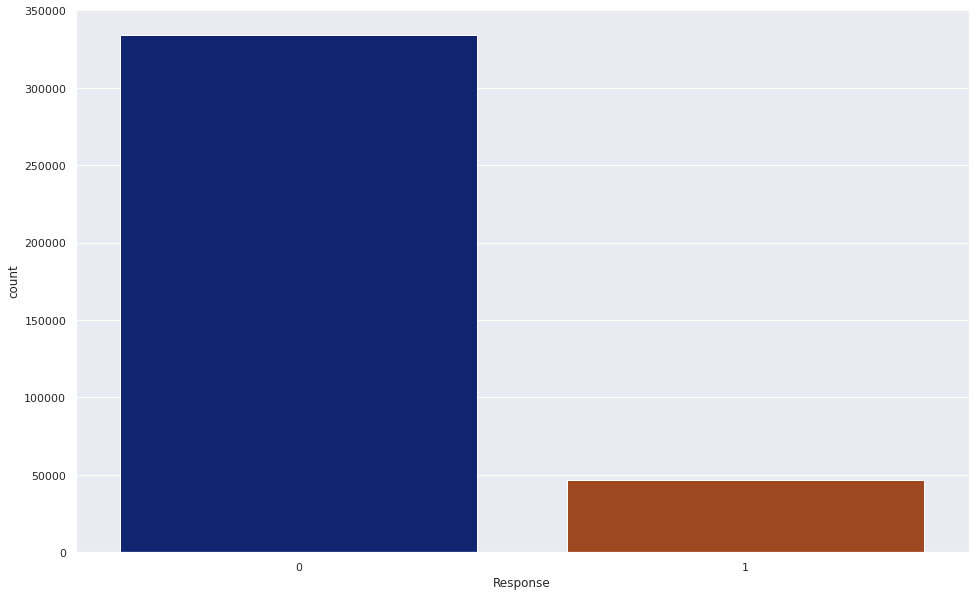

In [18]:
sns.countplot(df_train['Response'],data=df_train)

In [19]:
counts = df_train["Response"].value_counts()
print(f"No = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Yes = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")

No = 334399 (87.74%)
Yes = 46710 (12.26%)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

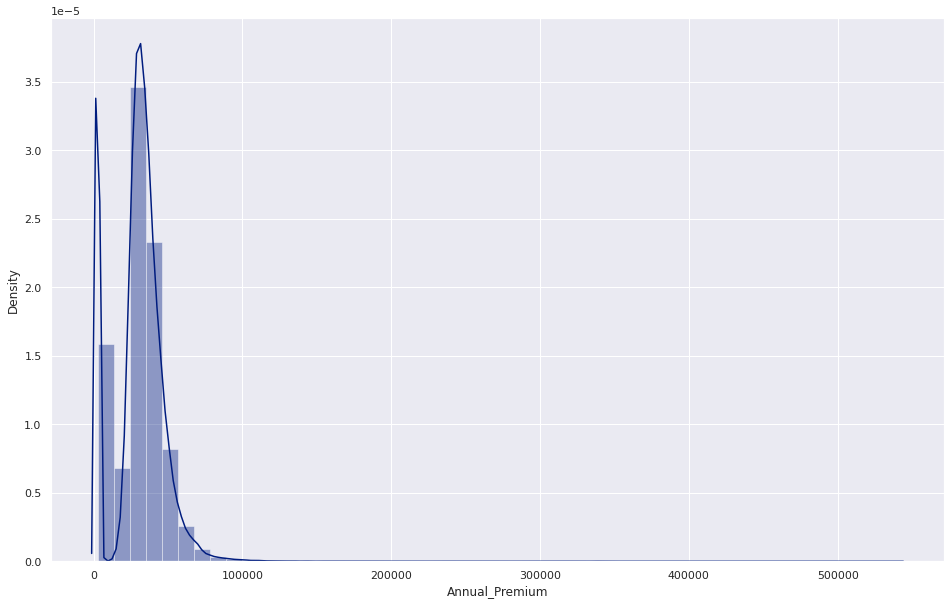

In [20]:
sns.distplot(df_train['Annual_Premium'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual_Premium'>

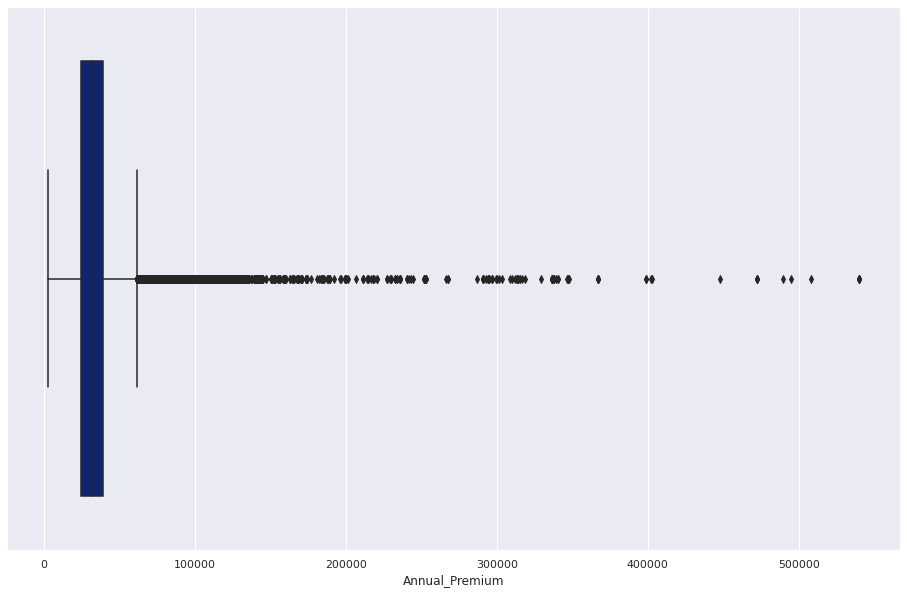

In [21]:
sns.boxplot(df_train['Annual_Premium'])

In [22]:
df_train["Annual_Premium"].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

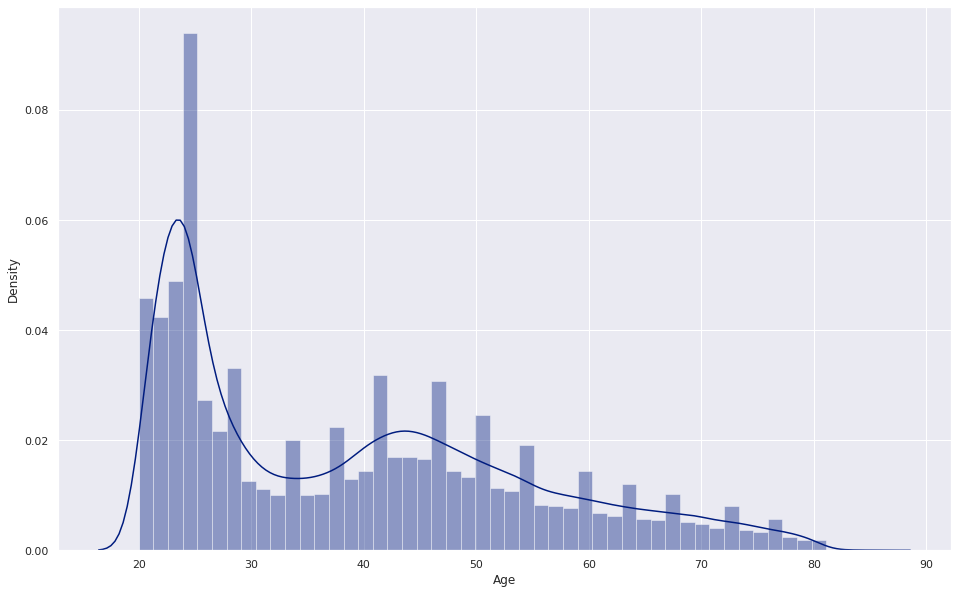

In [23]:
sns.distplot(df_train['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

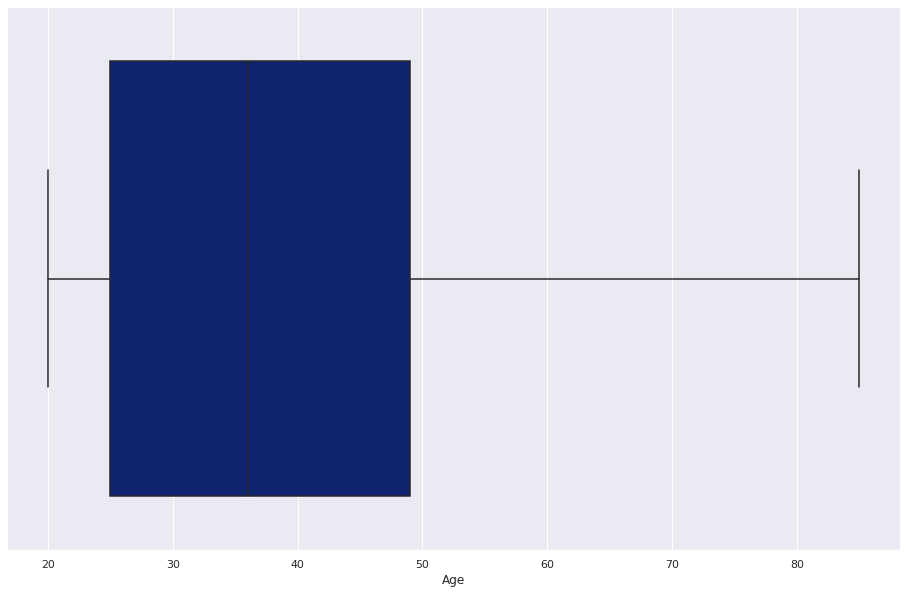

In [24]:
sns.boxplot(df_train['Age'])

In [25]:
df_train["Age"].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [26]:
df_train["Age"].value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

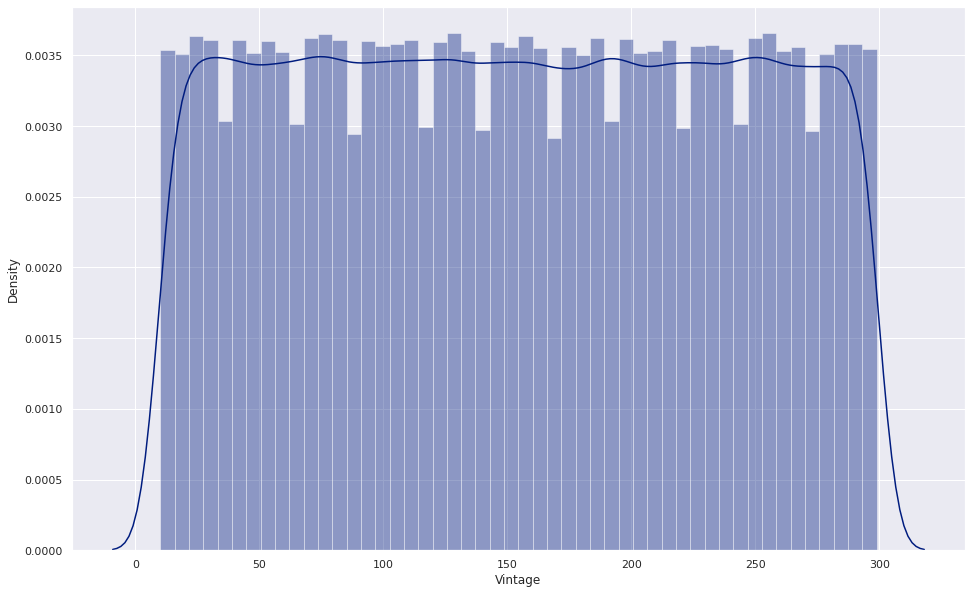

In [27]:
sns.distplot(df_train['Vintage'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vintage'>

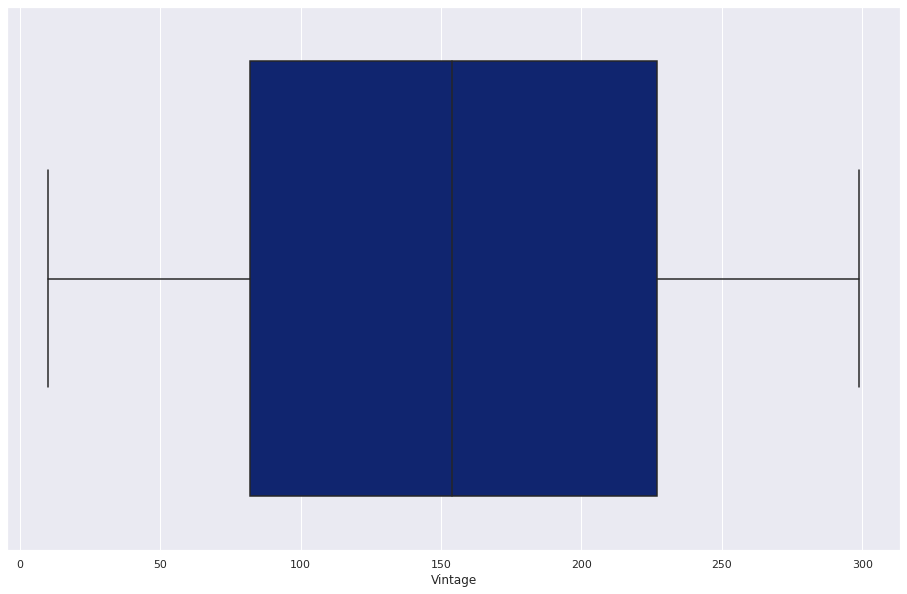

In [28]:
sns.boxplot(df_train['Vintage'])

In [29]:
df_train["Vintage"].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [30]:
df_train["Vintage"].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

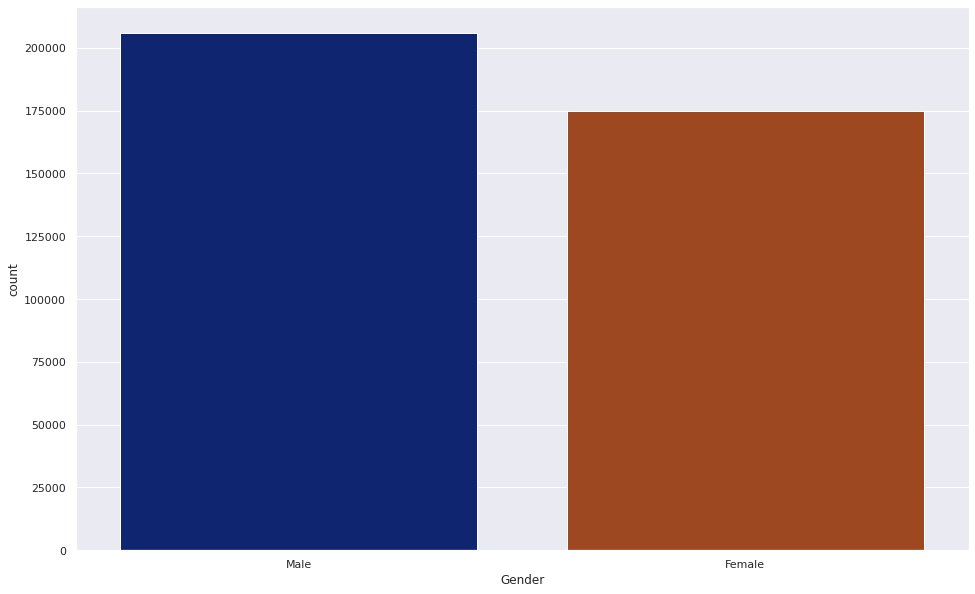

In [31]:
sns.countplot(df_train['Gender'],data=df_train)

In [32]:
df_train["Gender"].value_counts

<bound method IndexOpsMixin.value_counts of 0           Male
1           Male
2           Male
3           Male
4         Female
           ...  
381104      Male
381105      Male
381106      Male
381107    Female
381108      Male
Name: Gender, Length: 381109, dtype: object>

In [33]:
counts = df_train["Gender"].value_counts()
print(f"Male = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Female = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")

Male = 206089 (54.08%)
Female = 175020 (45.92%)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Driving_License', ylabel='count'>

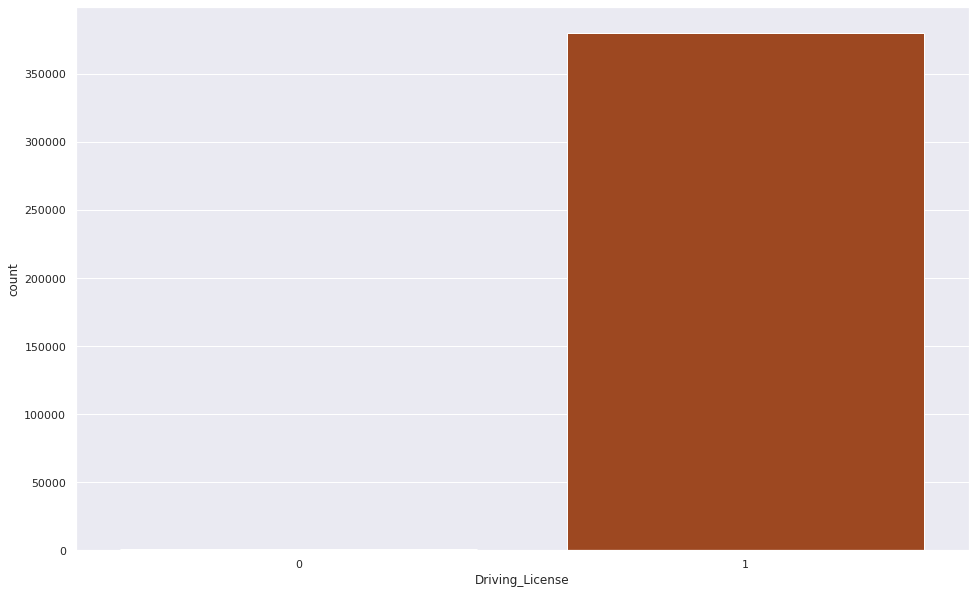

In [34]:
sns.countplot(df_train['Driving_License'],data=df_train)

In [35]:
df_train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [36]:
counts = df_train["Driving_License"].value_counts()
print(f"No = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Yes = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")

No = 812 (0.21%)
Yes = 380297 (99.79%)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

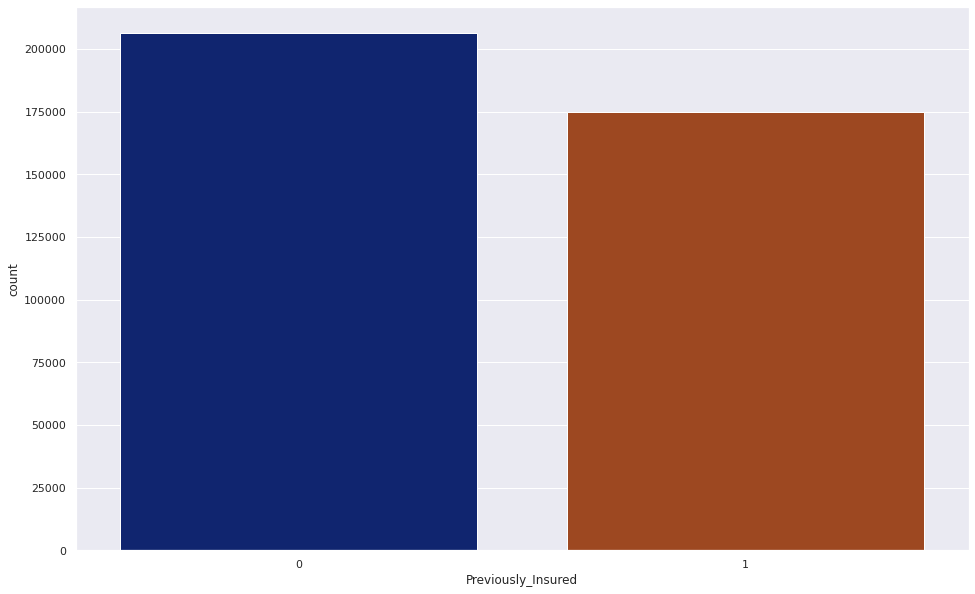

In [37]:
sns.countplot(df_train['Previously_Insured'],data=df_train)

In [39]:
df_train['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [40]:
counts = df_train["Previously_Insured"].value_counts()
print(f"No = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Yes = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")

No = 206481 (54.18%)
Yes = 174628 (45.82%)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

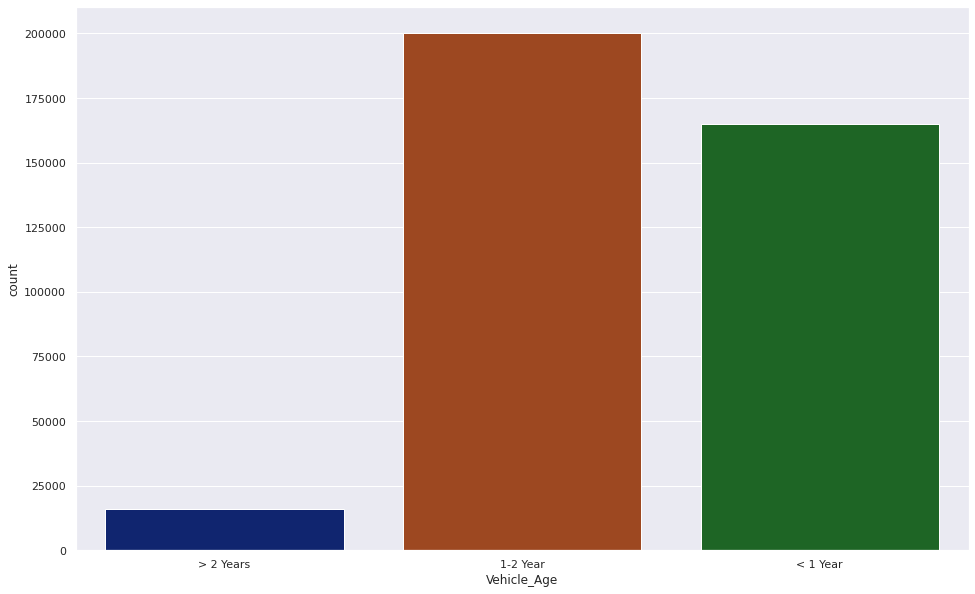

In [41]:
sns.countplot(df_train["Vehicle_Age"],data=df_train)

In [ ]:
counts = df_train["Vehicle_Age"].value_counts()
print(f"1-2 Year = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"< 1 Year = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")
print(f"> 2 Years = {counts[2]} ({counts[2]/counts.sum()*100:.2f}%)")

In [ ]:
sns.countplot(df_train["Vehicle_Damage"],data=df_train)

In [43]:
df_train["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [44]:
counts = df_train["Vehicle_Damage"].value_counts()
print(f"Yes = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"No = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")

Yes = 192413 (50.49%)
No = 188696 (49.51%)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region_Code', ylabel='count'>

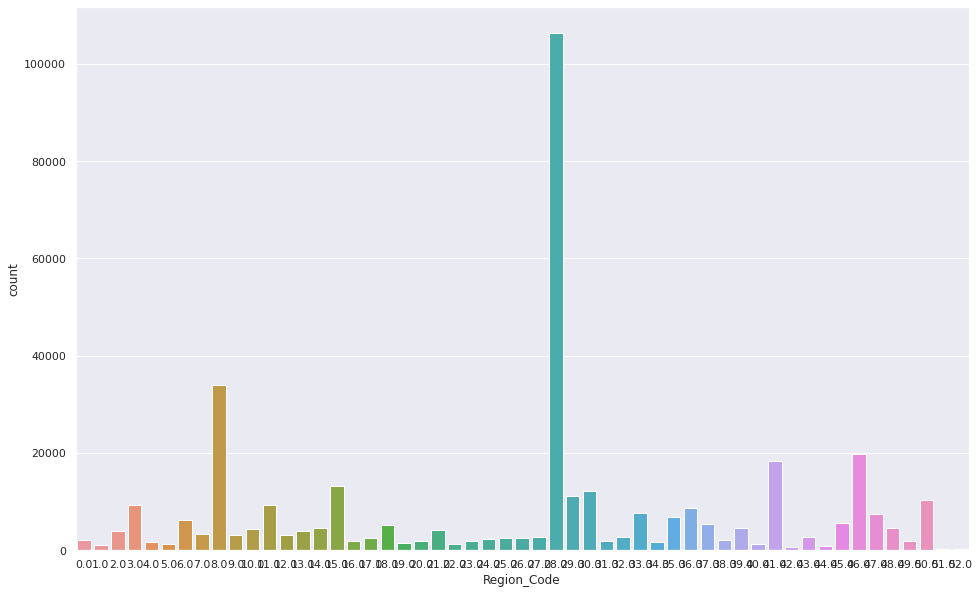

In [45]:
sns.countplot(df_train["Region_Code"],data=df_train)

In [46]:
df_train["Region_Code"].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='count'>

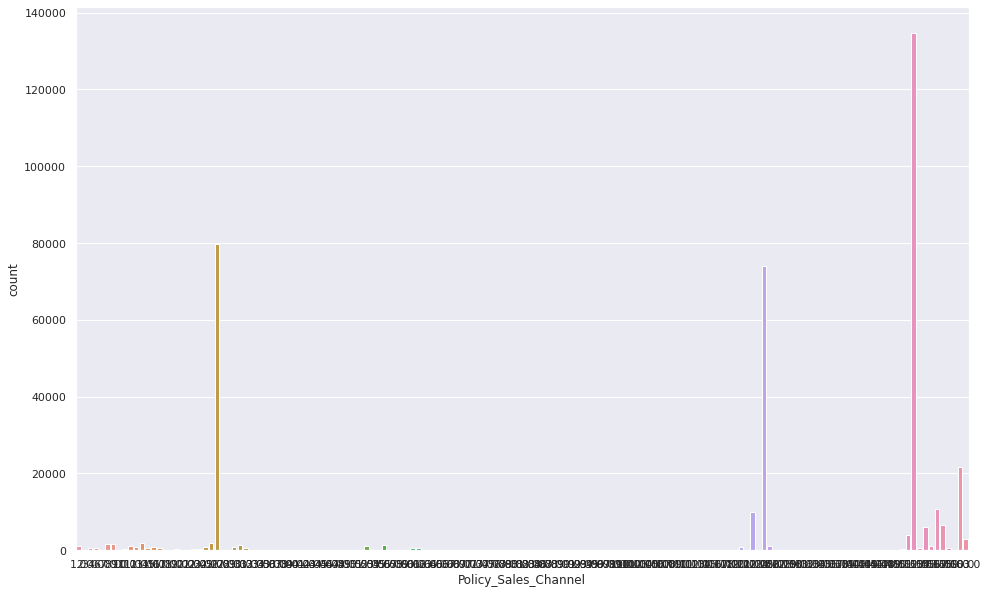

In [47]:
sns.countplot(df_train["Policy_Sales_Channel"],data=df_train)

In [48]:
df_train["Policy_Sales_Channel"].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

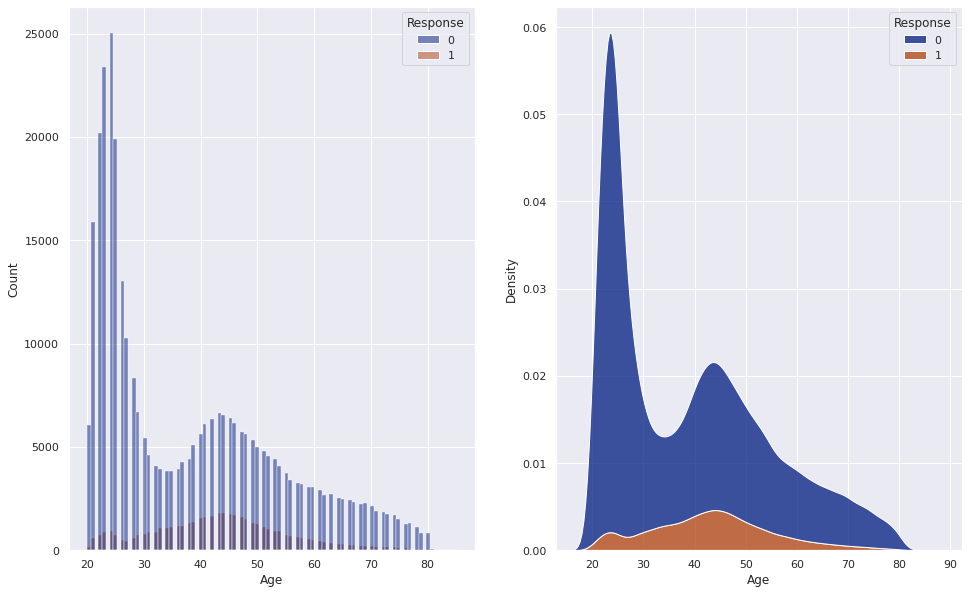

In [49]:
plt.subplot(1, 2, 1)
sns.histplot(x="Age", data=df_train, hue="Response")

plt.subplot(1, 2, 2)
sns.kdeplot(x="Age", data=df_train, hue="Response", multiple="stack")

Text(0.5, 1.0, 'Correlation between Age and Response')

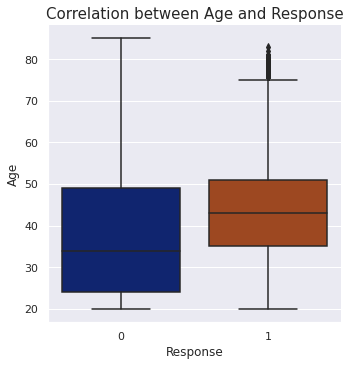

In [50]:
sns.catplot(x="Response", 
            y="Age", 
            data=df_train, 
            kind="box")
plt.title("Correlation between Age and Response", size=15, y=1.0)

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

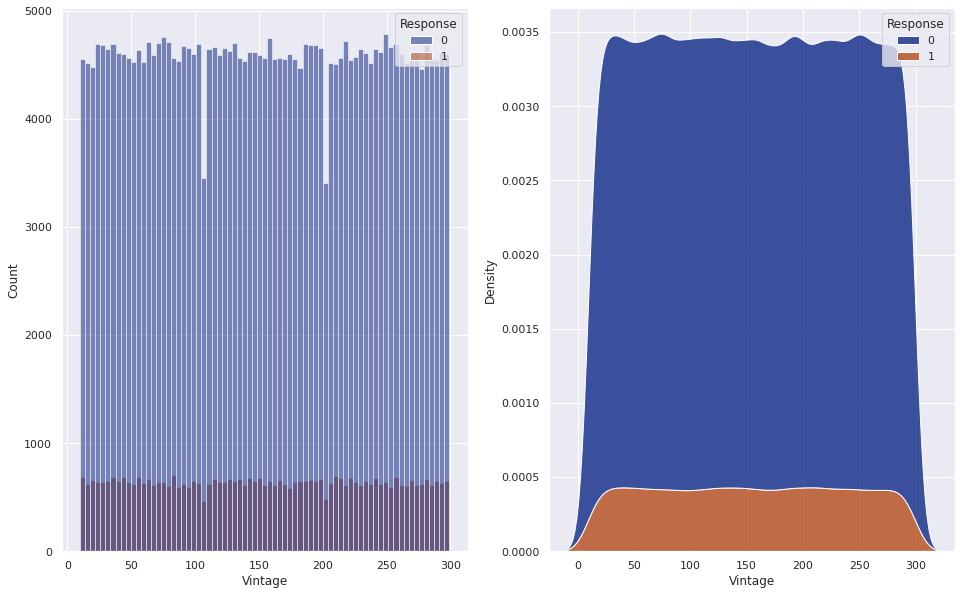

In [51]:
plt.subplot(1, 2, 1)
sns.histplot(x="Vintage", data=df_train, hue="Response")

plt.subplot(1, 2, 2)
sns.kdeplot(x="Vintage", data=df_train, hue="Response", multiple="stack")

Text(0.5, 1.0, 'Correlation between Vintage code and Response')

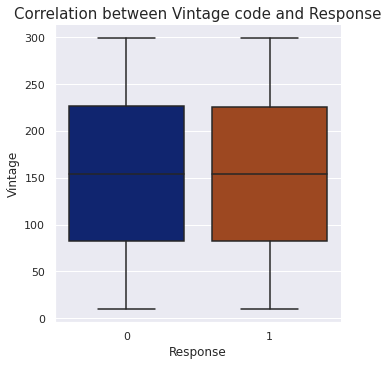

In [52]:
sns.catplot(x="Response", 
            y="Vintage", 
            data=df_train, 
            kind="box")
plt.title("Correlation between Vintage code and Response", size=15, y=1.0)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

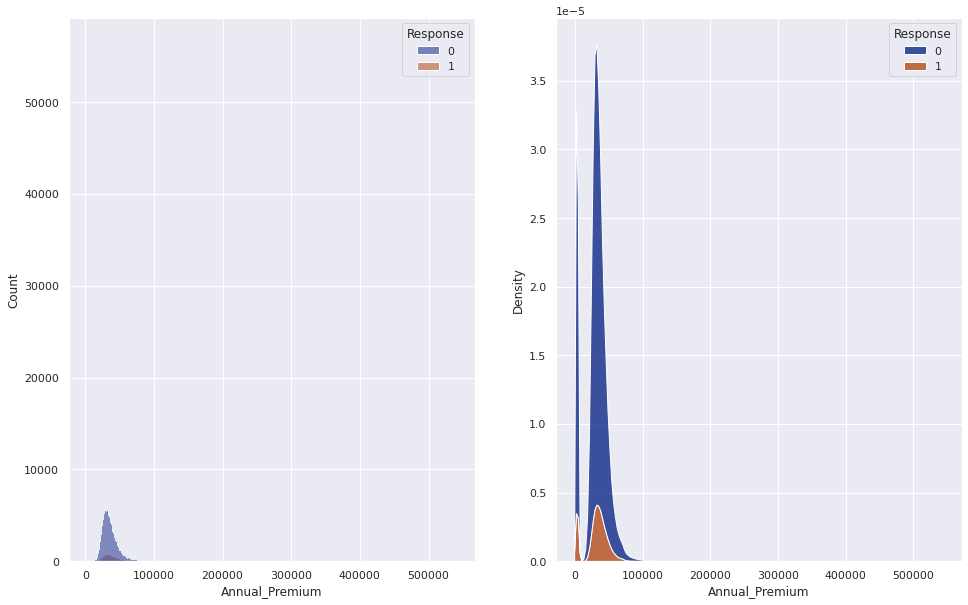

In [53]:
plt.subplot(1, 2, 1)
sns.histplot(x="Annual_Premium", data=df_train, hue="Response")

plt.subplot(1, 2, 2)
sns.kdeplot(x="Annual_Premium", data=df_train, hue="Response", multiple="stack")

Text(0.5, 1.0, 'Correlation between Annual_Premium and Response')

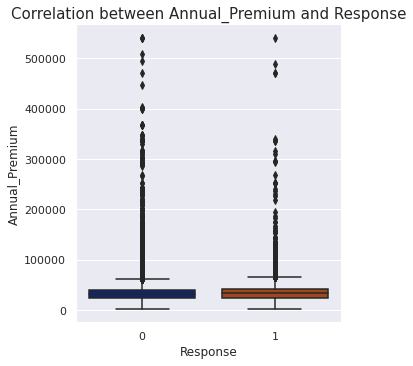

In [54]:
sns.catplot(x="Response", 
            y="Annual_Premium", 
            data=df_train, 
            kind="box")
plt.title("Correlation between Annual_Premium and Response", size=15, y=1.0)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Count'>

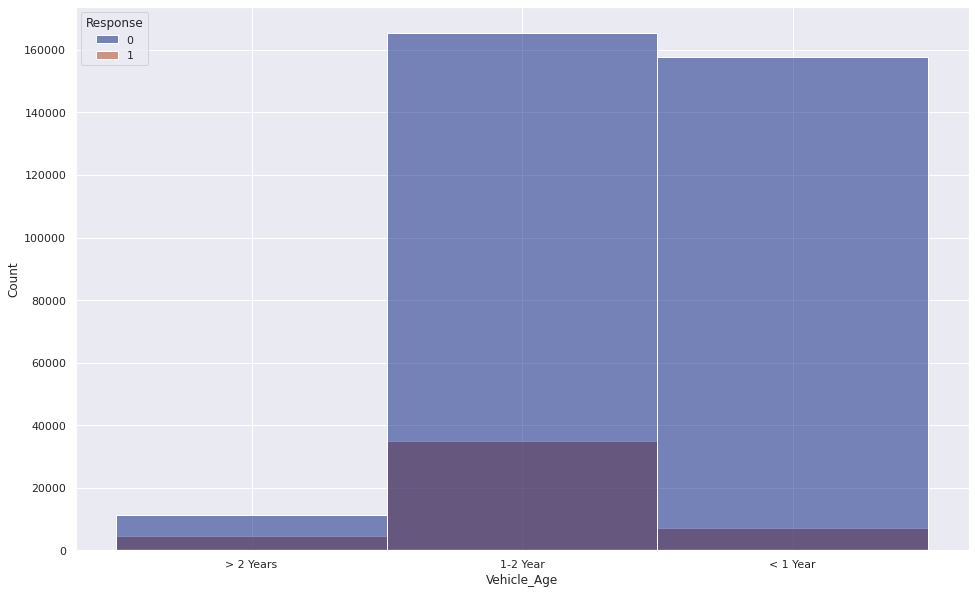

In [55]:
sns.histplot(x="Vehicle_Age", data=df_train, hue="Response")

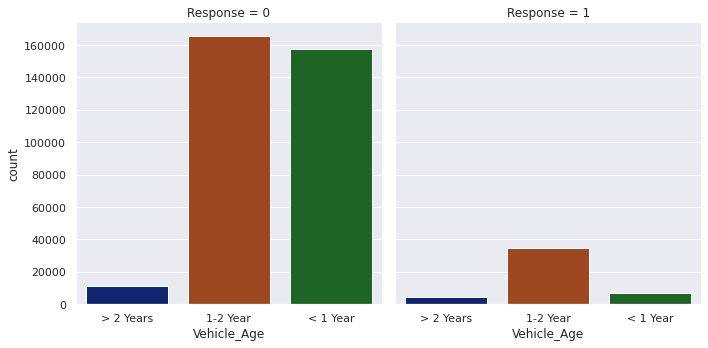

In [56]:
sns.catplot(x="Vehicle_Age", 
            col="Response", 
            data=df_train, 
            kind="count")

In [57]:
df_train.groupby(["Vehicle_Age", "Response"]).size().unstack()

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


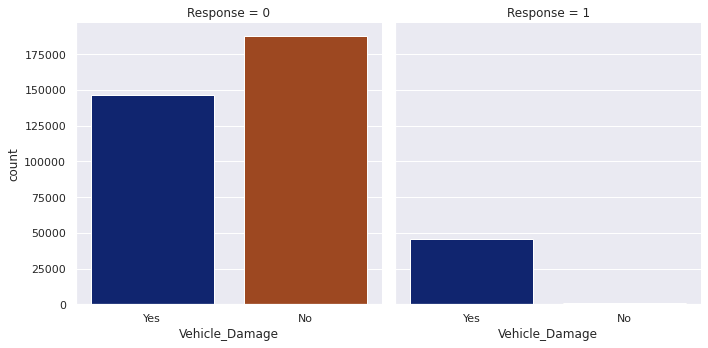

In [58]:
sns.catplot(x="Vehicle_Damage", 
            col="Response", 
            data=df_train, 
            kind="count")

In [59]:
df_train.groupby(["Vehicle_Damage", "Response"]).size().unstack()

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


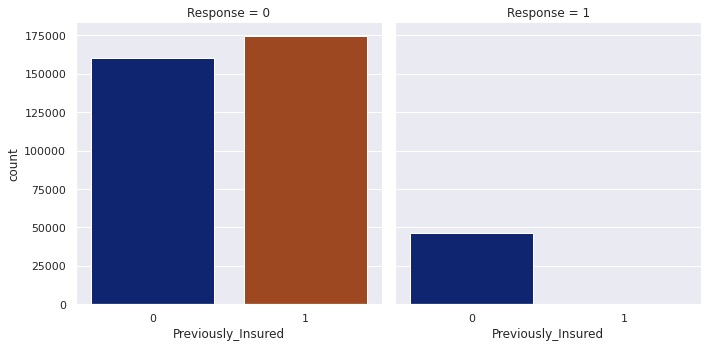

In [60]:
sns.catplot(x="Previously_Insured", 
            col="Response", 
            data=df_train, 
            kind="count")

In [61]:
df_train.groupby(["Previously_Insured", "Response"]).size().unstack()

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

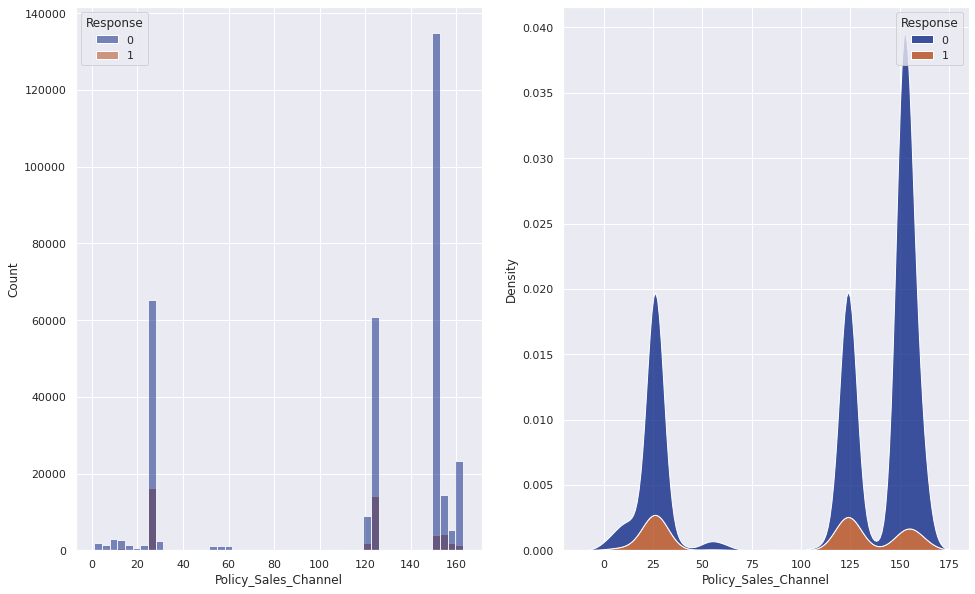

In [62]:
plt.subplot(1, 2, 1)
sns.histplot(x="Policy_Sales_Channel", data=df_train, hue="Response")

plt.subplot(1, 2, 2)
sns.kdeplot(x="Policy_Sales_Channel", data=df_train, hue="Response", multiple="stack")

Text(0.5, 1.0, 'Correlation between Gender and Response ')

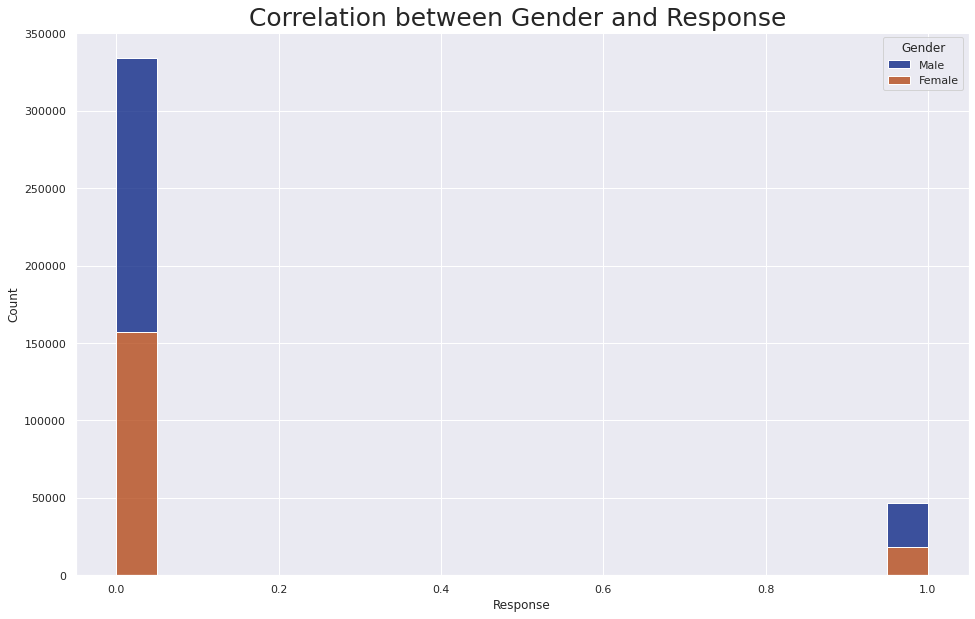

In [63]:
sns.histplot(data = df_train,
            x = "Response",
            hue = "Gender",
            multiple="stack")
plt.title("Correlation between Gender and Response ", size=25, y=1.0)

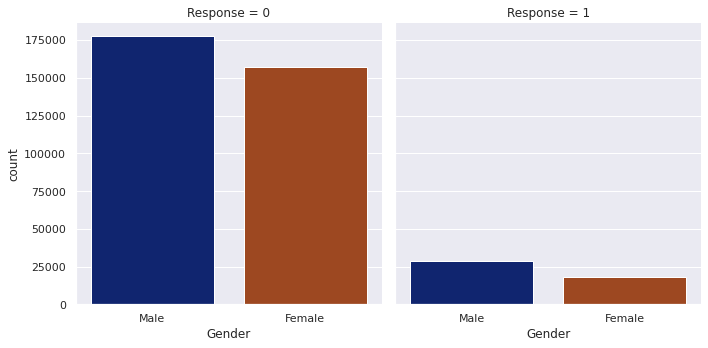

In [64]:
sns.catplot(x="Gender", 
            col="Response", 
            data=df_train, 
            kind="count")

In [65]:
df_train.groupby(["Gender", "Response"]).size().unstack()

Response,0,1
Gender,,
Female,156835,18185
Male,177564,28525


Text(0.5, 1.0, 'Correlation between Driving License and Response ')

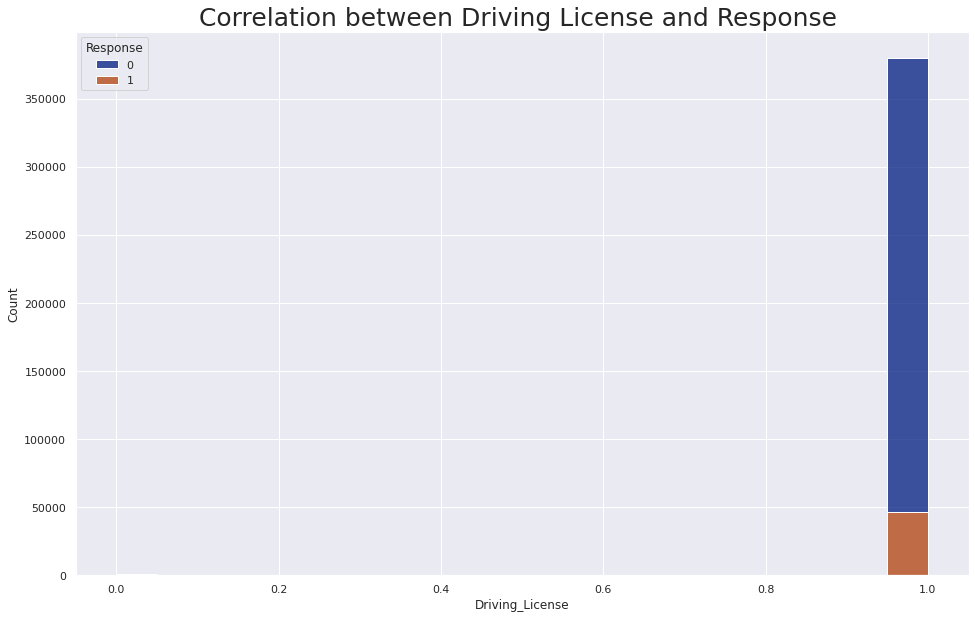

In [66]:
sns.histplot(data = df_train,
            x = "Driving_License",
            hue = "Response",
            multiple="stack")
plt.title("Correlation between Driving License and Response ", size=25, y=1.0)

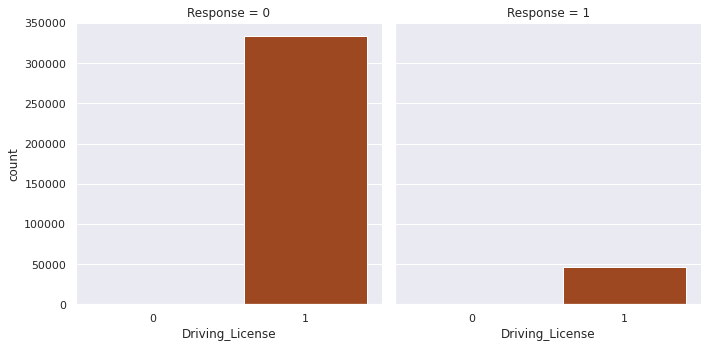

In [67]:
sns.catplot(x="Driving_License", 
            col="Response", 
            data=df_train, 
            kind="count")

In [68]:
df_train.groupby(["Driving_License", "Response"]).size().unstack()

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


Text(0.5, 1.0, 'Correlation between Region code and Response')

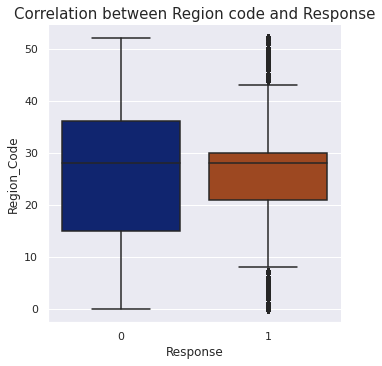

In [69]:
sns.catplot(x="Response", 
            y="Region_Code", 
            data=df_train, 
            kind="box")
plt.title("Correlation between Region code and Response", size=15, y=1.0)

<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

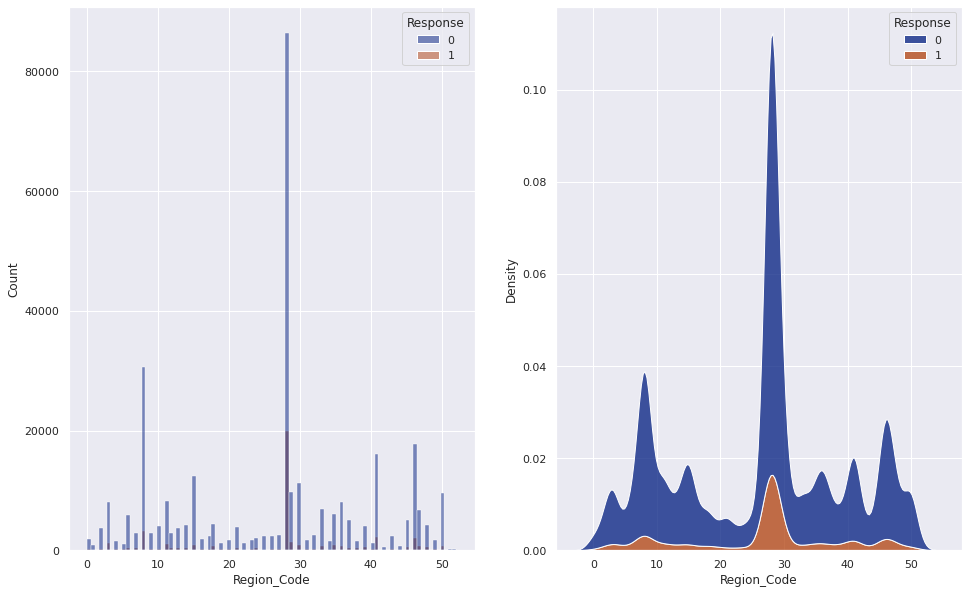

In [70]:
plt.subplot(1, 2, 1)
sns.histplot(x="Region_Code", data=df_train, hue="Response")

plt.subplot(1, 2, 2)
sns.kdeplot(x="Region_Code", data=df_train, hue="Response", multiple="stack")

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

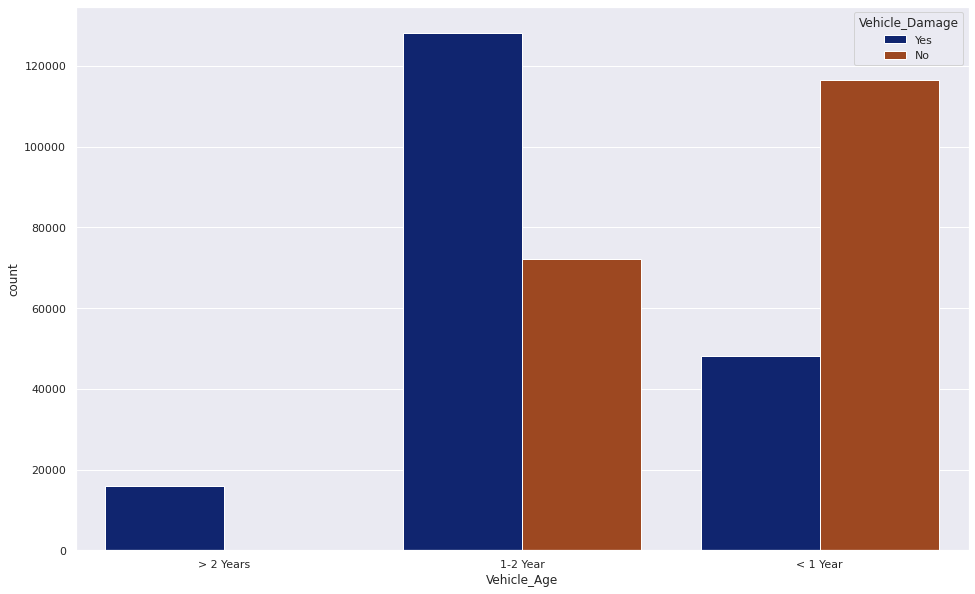

In [71]:
sns.countplot(data=df_train,
              x='Vehicle_Age',
              hue='Vehicle_Damage')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

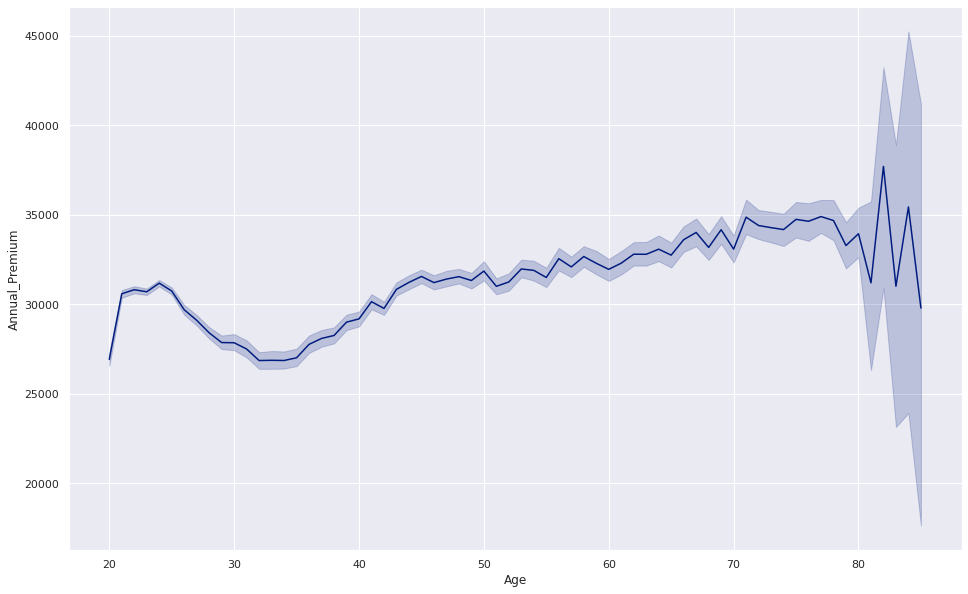

In [72]:
sns.lineplot(df_train["Age"],
             df_train["Annual_Premium"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

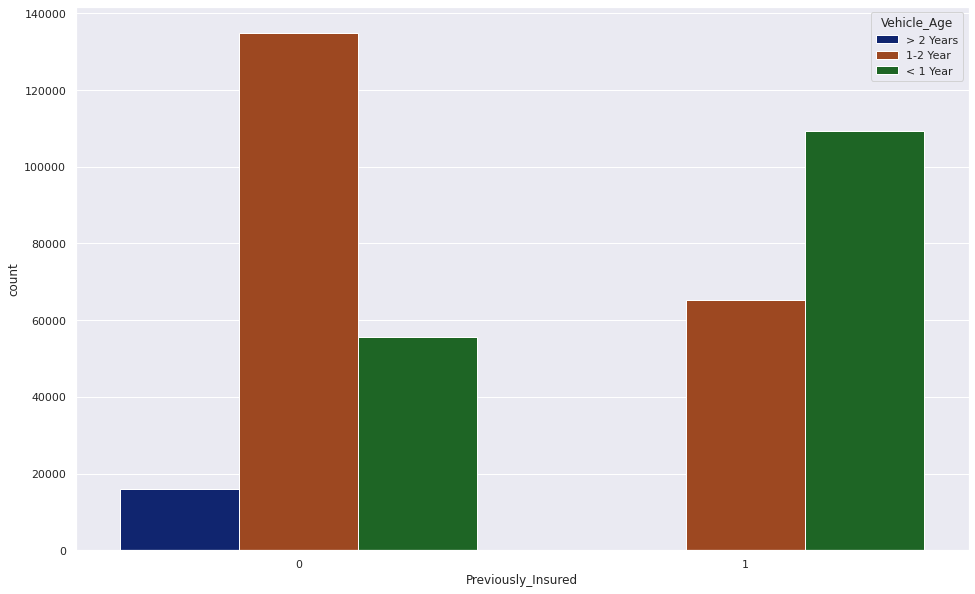

In [73]:
sns.countplot(df_train["Previously_Insured"],
              hue=df_train["Vehicle_Age"])

<AxesSubplot:>

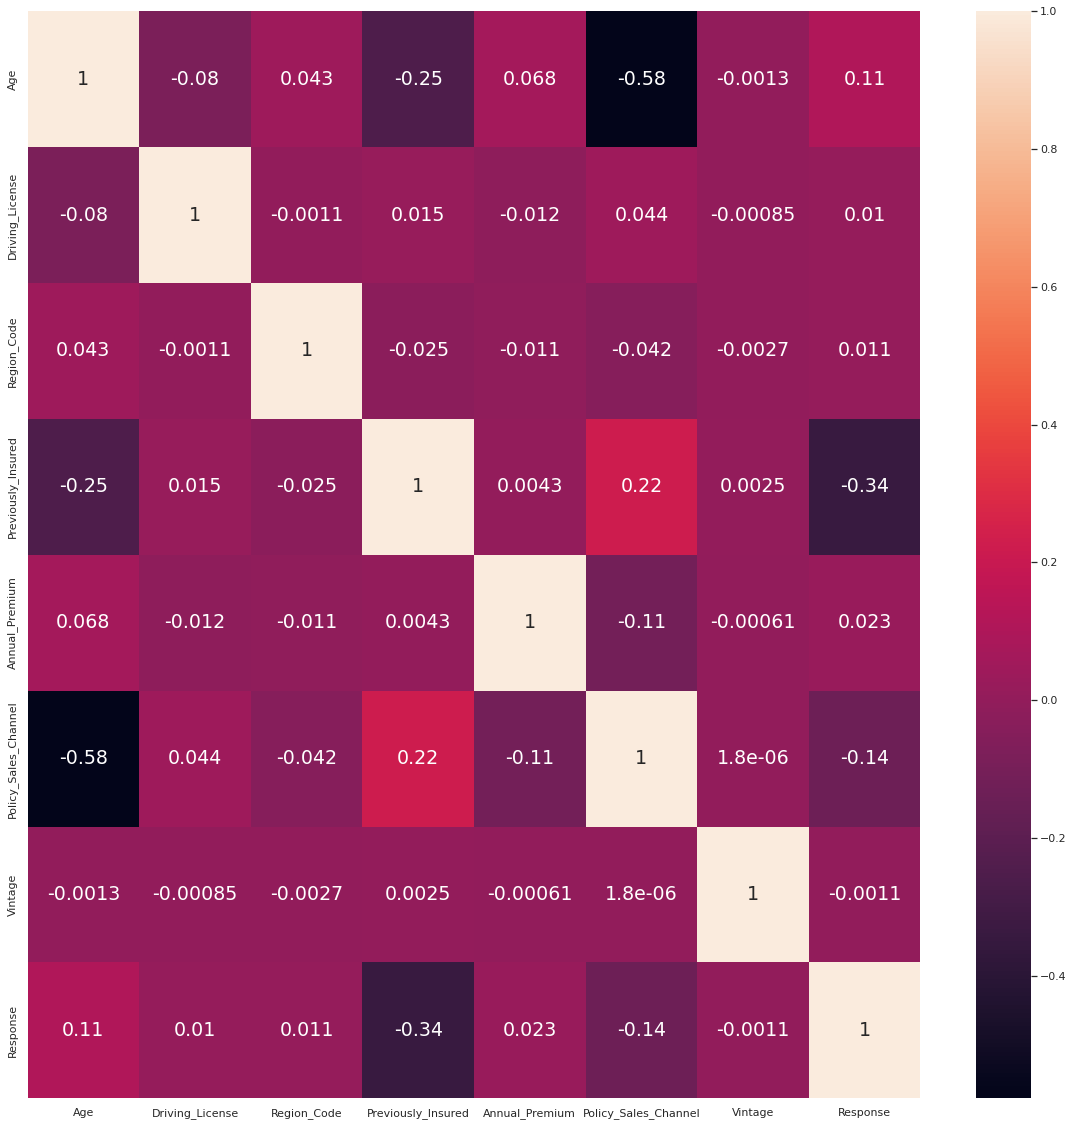

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True, annot_kws={"size":19})

In [75]:
correlation = df_train.corr()
correlation["Response"].sort_values(ascending = False)[1:]

Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [76]:
num_columns = ['Age', 'Annual_Premium', 'Vintage']

ss= StandardScaler()
ss.fit(df_train[num_columns])

df_train[num_columns] = ss.transform(df_train[num_columns])

df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,0.333777,1,28.0,0,> 2 Years,Yes,0.574539,26.0,0.748795,1
1,Male,2.396751,1,3.0,0,1-2 Year,No,0.172636,26.0,0.342443,0
2,Male,0.527181,1,28.0,0,> 2 Years,Yes,0.449053,26.0,-1.521998,1
3,Male,-1.148985,1,11.0,1,< 1 Year,No,-0.113018,152.0,0.581474,0
4,Female,-0.633242,1,41.0,1,< 1 Year,No,-0.178259,152.0,-1.378580,0


In [77]:
num_columns = ['Age', 'Annual_Premium', 'Vintage']

ss= StandardScaler()
ss.fit(dataset_test[num_columns])

dataset_test[num_columns] = ss.transform(dataset_test[num_columns])

dataset_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,-0.890089,1,11.0,1,< 1 Year,No,0.310492,152.0,-1.211054
1,381111,Male,0.079795,1,28.0,0,1-2 Year,Yes,0.191048,7.0,-0.517782
2,381112,Male,0.532408,1,28.0,0,1-2 Year,Yes,0.562126,124.0,0.534079
3,381113,Male,-0.954748,1,27.0,1,< 1 Year,Yes,0.403143,152.0,0.390643
4,381114,Male,-0.760771,1,28.0,1,< 1 Year,No,1.686159,152.0,1.705469


In [78]:
df_train = pd.get_dummies(df_train, columns=["Gender", "Previously_Insured",
                                             "Driving_License", "Vehicle_Damage", "Vehicle_Age"],
                         drop_first=True)
df_train.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Previously_Insured_1,Driving_License_1,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0.333777,28.0,0.574539,26.0,0.748795,1,1,0,1,1,0,1
1,2.396751,3.0,0.172636,26.0,0.342443,0,1,0,1,0,0,0
2,0.527181,28.0,0.449053,26.0,-1.521998,1,1,0,1,1,0,1
3,-1.148985,11.0,-0.113018,152.0,0.581474,0,1,1,1,0,1,0
4,-0.633242,41.0,-0.178259,152.0,-1.378580,0,0,1,1,0,1,0


In [79]:
df_train.shape

(381109, 12)

In [80]:
dataset_test = pd.get_dummies(dataset_test, columns=["Gender", "Previously_Insured",
                                             "Driving_License", "Vehicle_Damage", "Vehicle_Age"],
                         drop_first=True)
dataset_test.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Previously_Insured_1,Driving_License_1,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,381110,-0.890089,11.0,0.310492,152.0,-1.211054,1,1,1,0,1,0
1,381111,0.079795,28.0,0.191048,7.0,-0.517782,1,0,1,1,0,0
2,381112,0.532408,28.0,0.562126,124.0,0.534079,1,0,1,1,0,0
3,381113,-0.954748,27.0,0.403143,152.0,0.390643,1,1,1,1,1,0
4,381114,-0.760771,28.0,1.686159,152.0,1.705469,1,1,1,0,1,0


In [81]:
dataset_test.shape

(127037, 12)

In [82]:
df_train["Region_Code"] = df_train["Region_Code"].map(str)
df_train["Policy_Sales_Channel"] = df_train["Policy_Sales_Channel"].map(str)
dataset_test["Region_Code"] = dataset_test["Region_Code"].map(str)
dataset_test["Policy_Sales_Channel"] = dataset_test["Policy_Sales_Channel"].map(str)
encoder = TargetEncoder()

df_train["Region_Code_sklearn"] = encoder.fit_transform(df_train['Region_Code'], df_train['Response'])
dataset_test["Region_Code_sklearn"] = encoder.transform(dataset_test['Region_Code'])

/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [83]:
encoder = TargetEncoder()

df_train["Policy_Sales_Channel_sklearn"] = encoder.fit_transform(df_train['Policy_Sales_Channel'], df_train['Response'])
dataset_test["Policy_Sales_Channel_sklearn"] = encoder.transform(dataset_test['Policy_Sales_Channel'])

In [84]:
df_train.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Previously_Insured_1,Driving_License_1,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_sklearn,Policy_Sales_Channel_sklearn
0,0.333777,28.0,0.574539,26.0,0.748795,1,1,0,1,1,0,1,0.187163,0.199385
1,2.396751,3.0,0.172636,26.0,0.342443,0,1,0,1,0,0,0,0.127662,0.199385
2,0.527181,28.0,0.449053,26.0,-1.521998,1,1,0,1,1,0,1,0.187163,0.199385
3,-1.148985,11.0,-0.113018,152.0,0.581474,0,1,1,1,0,1,0,0.112760,0.028624
4,-0.633242,41.0,-0.178259,152.0,-1.378580,0,0,1,1,0,1,0,0.121776,0.028624


In [85]:
dataset_test.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Previously_Insured_1,Driving_License_1,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_sklearn,Policy_Sales_Channel_sklearn
0,381110,-0.890089,11.0,0.310492,152.0,-1.211054,1,1,1,0,1,0,0.112760,0.028624
1,381111,0.079795,28.0,0.191048,7.0,-0.517782,1,0,1,1,0,0,0.187163,0.113892
2,381112,0.532408,28.0,0.562126,124.0,0.534079,1,0,1,1,0,0,0.187163,0.189148
3,381113,-0.954748,27.0,0.403143,152.0,0.390643,1,1,1,1,1,0,0.074035,0.028624
4,381114,-0.760771,28.0,1.686159,152.0,1.705469,1,1,1,0,1,0,0.187163,0.028624


In [86]:
df_train.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                            -1.148103e-16
Annual_Premium                  1.383391e-17
Vintage                        -9.612889e-17
Response                        1.225634e-01
Gender_Male                     5.407613e-01
Previously_Insured_1            4.582101e-01
Driving_License_1               9.978694e-01
Vehicle_Damage_Yes              5.048766e-01
Vehicle_Age_< 1 Year            4.323855e-01
Vehicle_Age_> 2 Years           4.200111e-02
Region_Code_sklearn             1.225634e-01
Policy_Sales_Channel_sklearn    1.225615e-01
dtype: float64

In [87]:
df_train.std()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                             1.000001
Annual_Premium                  1.000001
Vintage                         1.000001
Response                        0.327936
Gender_Male                     0.498336
Previously_Insured_1            0.498251
Driving_License_1               0.046110
Vehicle_Damage_Yes              0.499977
Vehicle_Age_< 1 Year            0.495408
Vehicle_Age_> 2 Years           0.200592
Region_Code_sklearn             0.045286
Policy_Sales_Channel_sklearn    0.086360
dtype: float64

In [88]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision_recall=False):

    cm = confusion_matrix(y_true, y_pred) 

    df_cm = pd.DataFrame(cm, index = labels, 
                        columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
    sns.heatmap(df_cm, annot=True, fmt="g")

    if show_precision_recall:
        plt.text(0, -0.1, f"Precision: {(cm[1][1]/(cm[1][1]+cm[0][1])):.3f}")
        plt.text(1, -0.1, f"Recall: {(cm[1][1]/(cm[1][1]+cm[1][0])):.3f}")
def predict_and_plot(inputs, targets,name=''):
    preds=lr.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

In [89]:
X = df_train.drop(["Response", "Region_Code", "Policy_Sales_Channel"], axis=1).values
y = df_train["Response"].values

print(X.shape)
print(y.shape)

(381109, 11)
(381109,)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state= SEED)

lr = LogisticRegression(max_iter=700)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=700)

In [91]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test =  lr.predict_proba(X_test)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    233887
           1       0.34      0.01      0.01     32889

    accuracy                           0.88    266776
   macro avg       0.61      0.50      0.47    266776
weighted avg       0.81      0.88      0.82    266776

TEST REPORT
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    100512
           1       0.40      0.01      0.01     13821

    accuracy                           0.88    114333
   macro avg       0.64      0.50      0.47    114333
weighted avg       0.82      0.88      0.82    114333



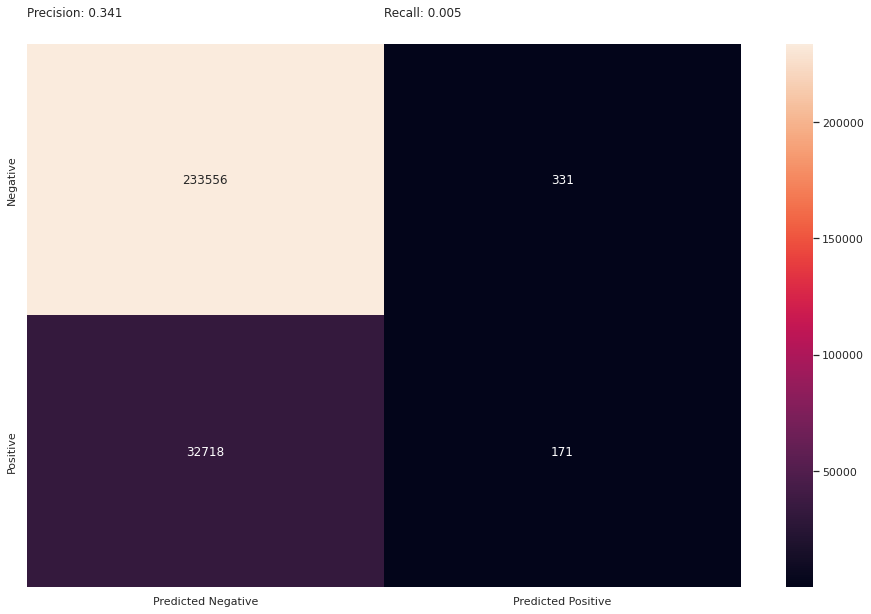

In [92]:
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

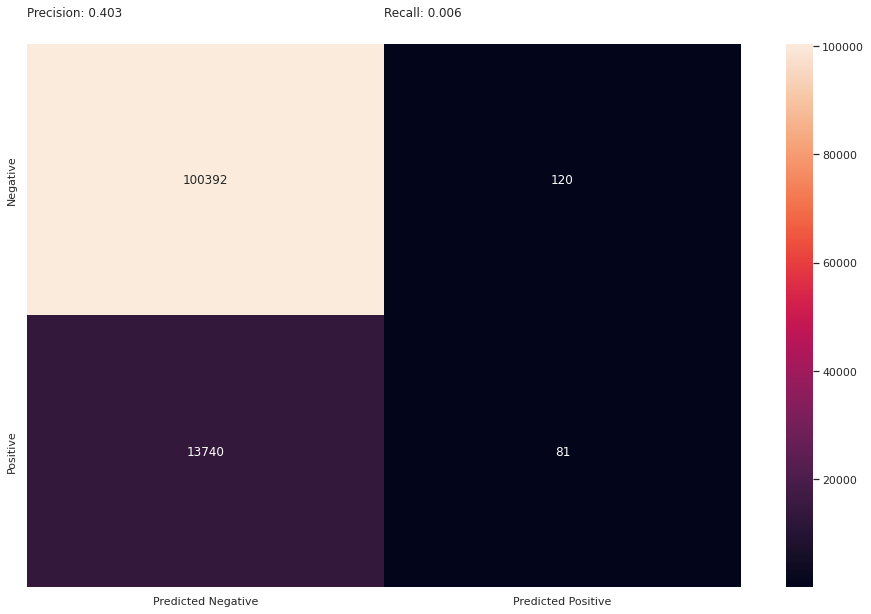

In [93]:
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

Accuracy: 87.61%


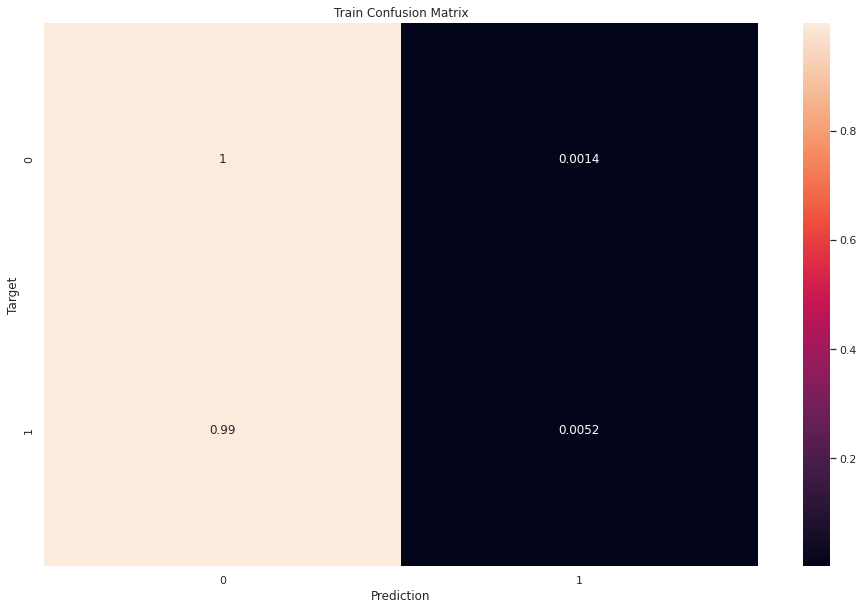

In [94]:
train_preds=predict_and_plot(X_train, y_train,'Train')

Accuracy: 87.88%


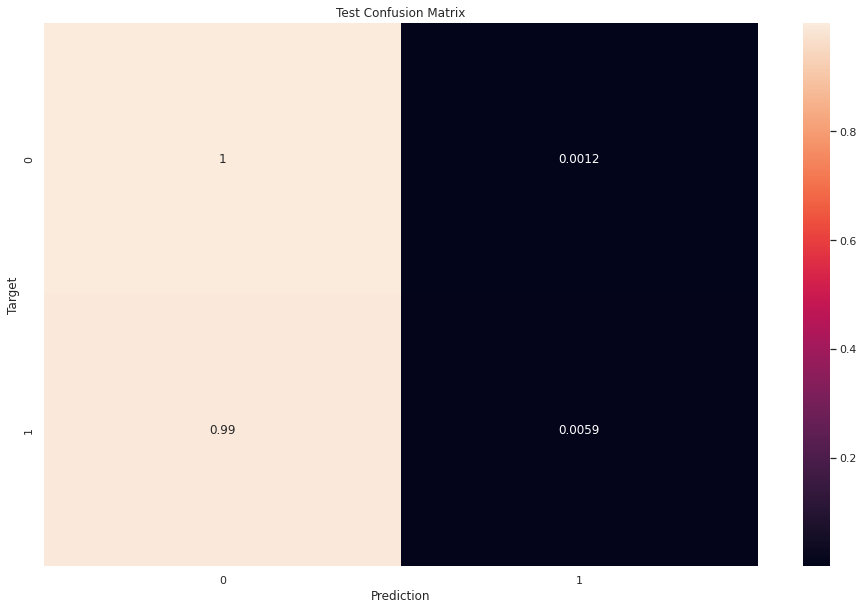

In [95]:
train_preds=predict_and_plot(X_test, y_test,'Test')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


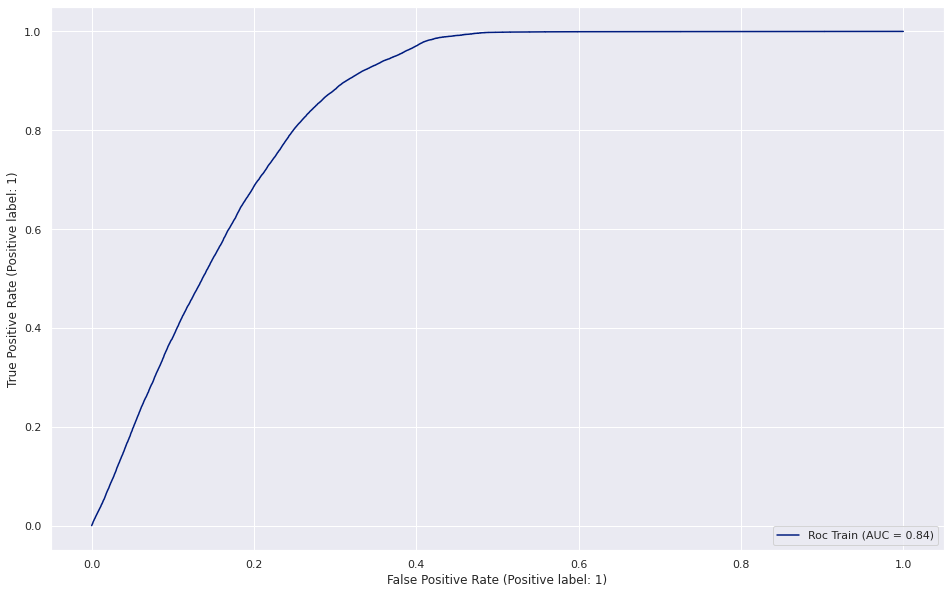

In [96]:
plot_roc_curve(lr, X_train, y_train, name="Roc Train")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


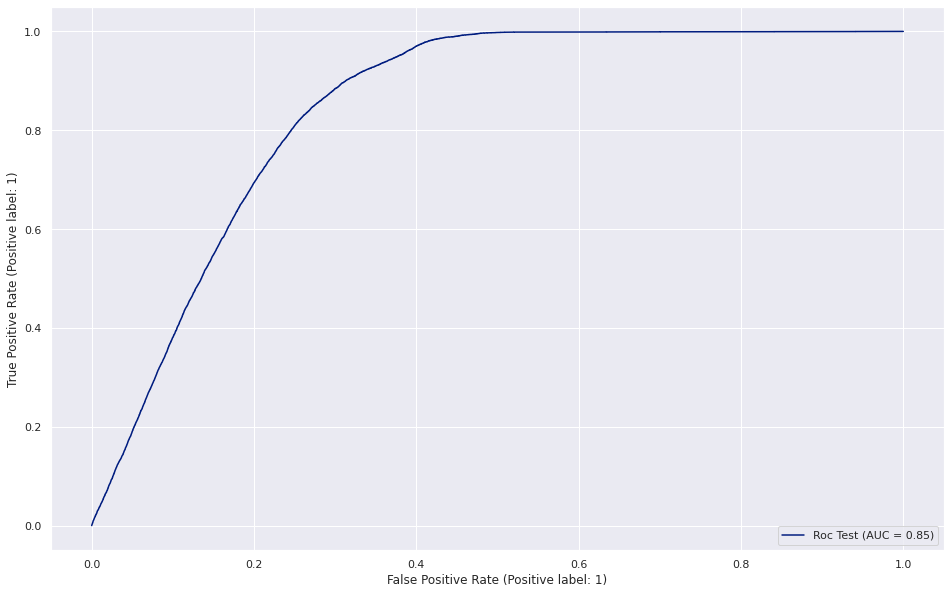

In [97]:
plot_roc_curve(lr, X_test, y_test, name="Roc Test")

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state= SEED)

lr = LogisticRegression(max_iter=700, class_weight= "balanced")
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=700)

In [99]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test =  lr.predict_proba(X_test)

y_pred_train = np.where(y_proba_train[:,1]>0.4, 1, 0)
y_pred_test = np.where(y_proba_test[:,1]>0.4, 1, 0)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    233887
           1       0.25      0.98      0.40     32889

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100512
           1       0.25      0.98      0.40     13821

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



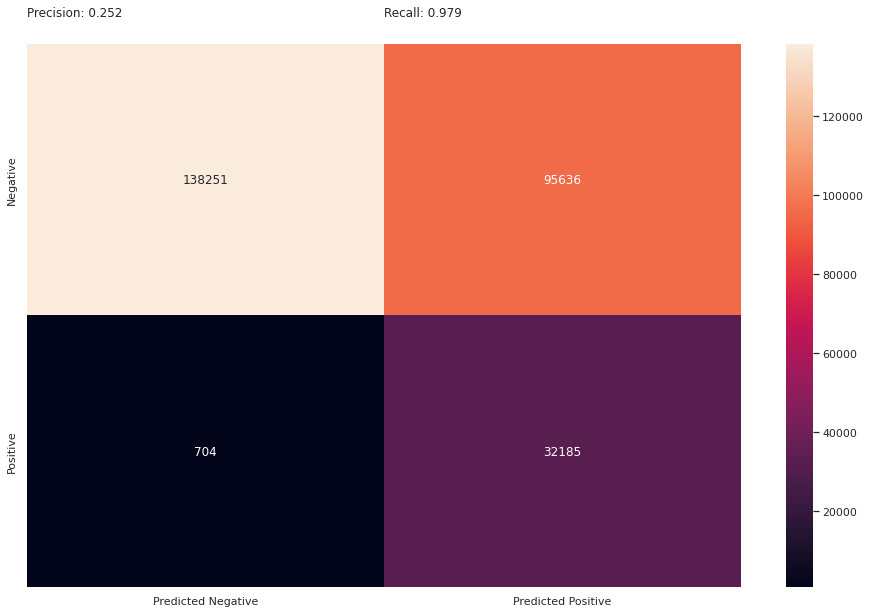

In [100]:
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

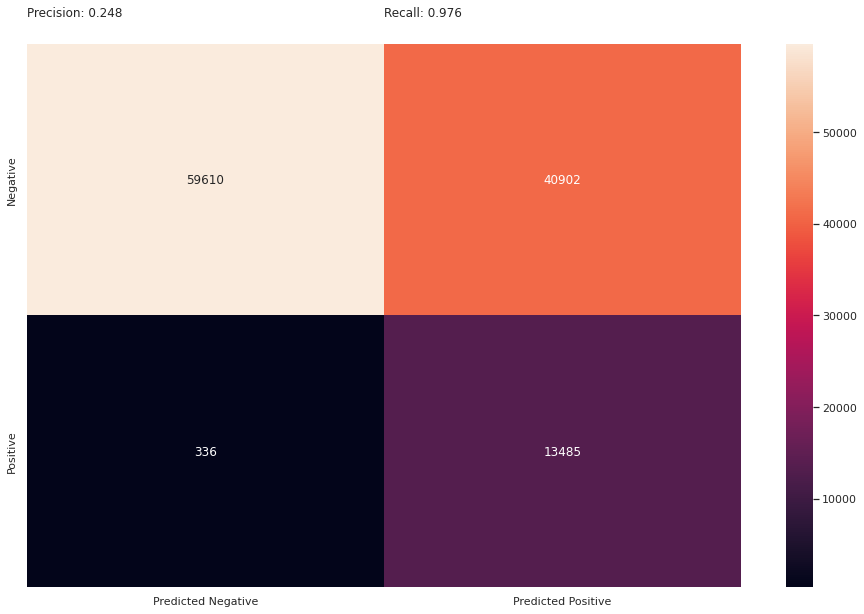

In [101]:
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

Accuracy: 68.93%


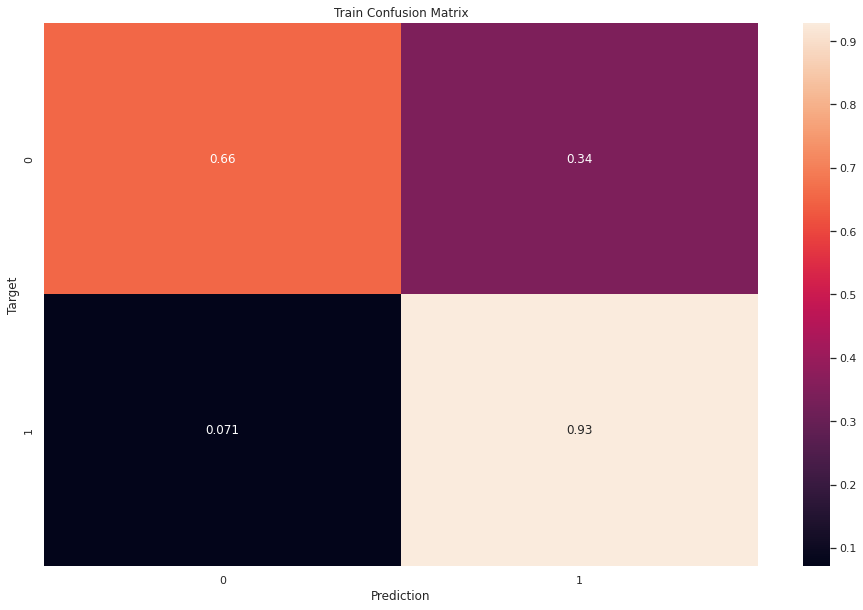

In [102]:
train_preds=predict_and_plot(X_train, y_train,'Train')

Accuracy: 68.99%


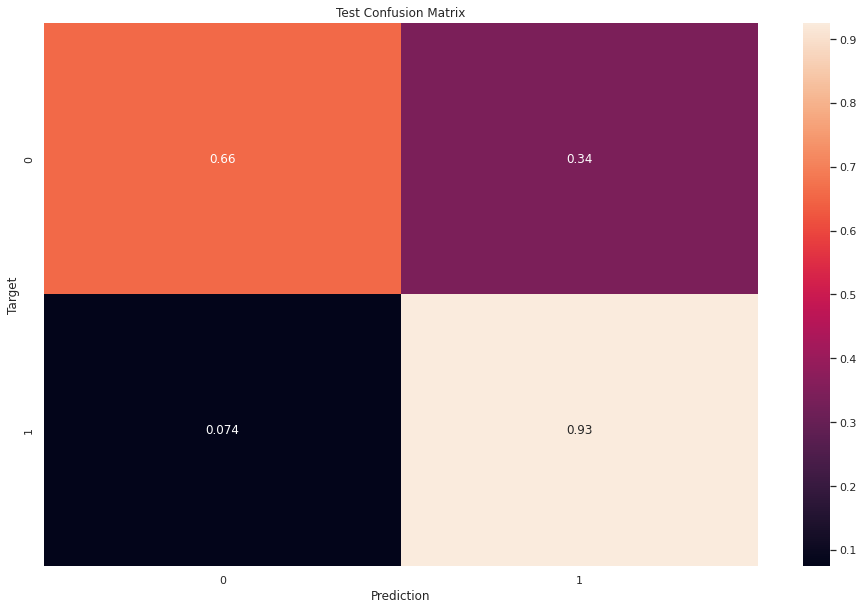

In [103]:
train_preds=predict_and_plot(X_test, y_test,'Test')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


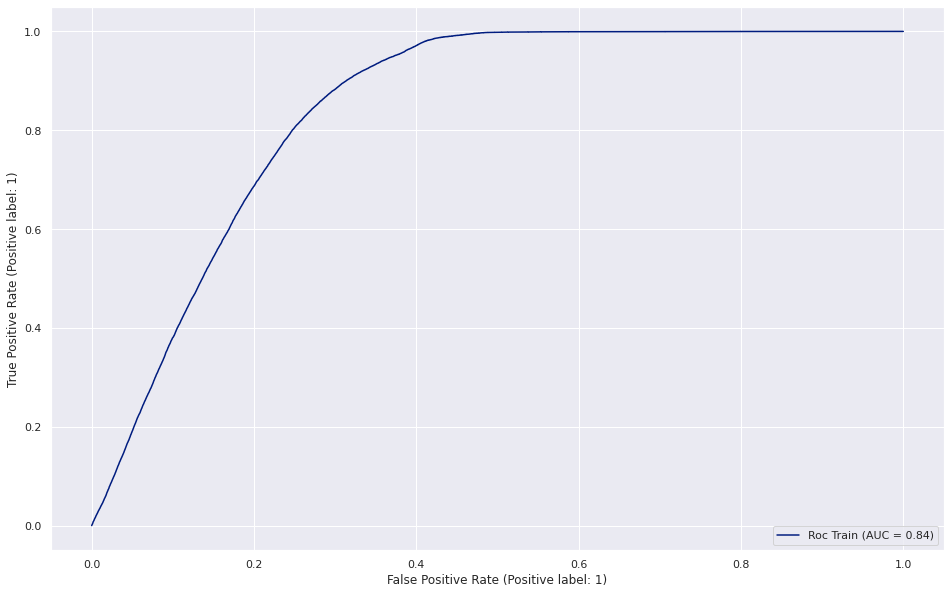

In [104]:
plot_roc_curve(lr, X_train, y_train, name="Roc Train")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


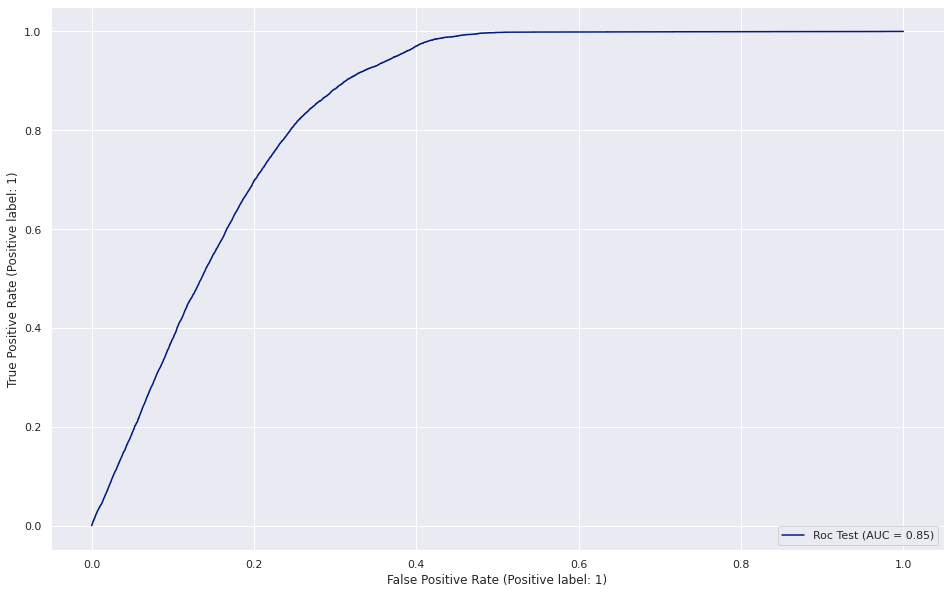

In [105]:
plot_roc_curve(lr, X_test, y_test, name="Roc Test")

In [106]:
rus = RandomUnderSampler(sampling_strategy = "majority", random_state=SEED)
X_res, y_res = rus.fit_resample(X, y)

print(X_res.shape)
print(y_res.shape)

(93420, 11)
(93420,)


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.3, random_state= SEED)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [108]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test =  lr.predict_proba(X_test)

y_pred_train = np.where(y_proba_train[:,1]>0.4, 1, 0)
y_pred_test = np.where(y_proba_test[:,1]>0.4, 1, 0)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.60      0.74     32668
           1       0.71      0.98      0.82     32726

    accuracy                           0.79     65394
   macro avg       0.84      0.79      0.78     65394
weighted avg       0.84      0.79      0.78     65394

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     14042
           1       0.71      0.98      0.82     13984

    accuracy                           0.79     28026
   macro avg       0.84      0.79      0.78     28026
weighted avg       0.84      0.79      0.78     28026



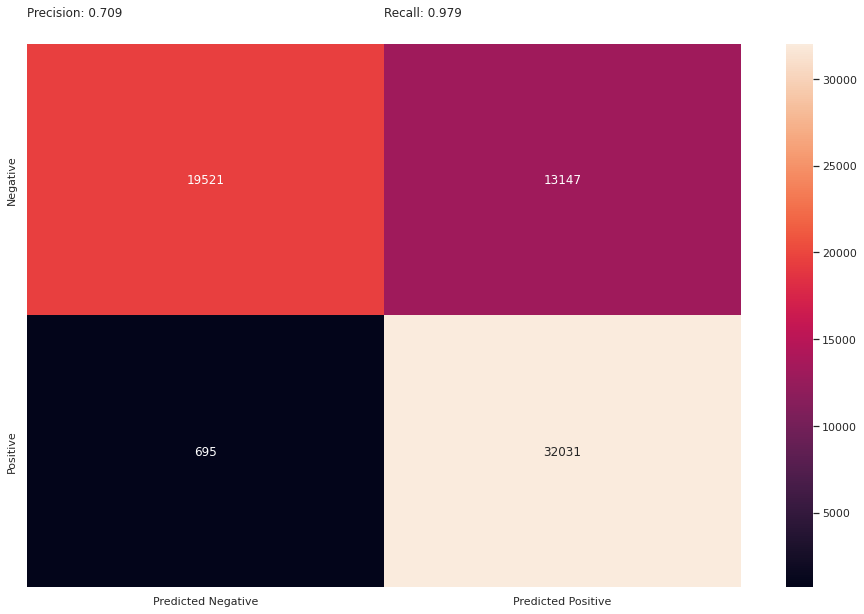

In [109]:
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

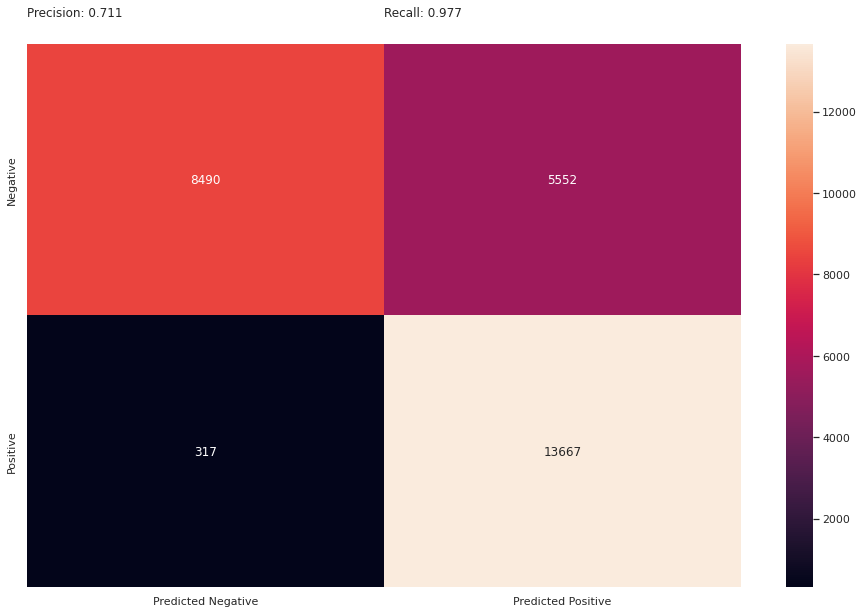

In [110]:
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

Accuracy: 79.47%


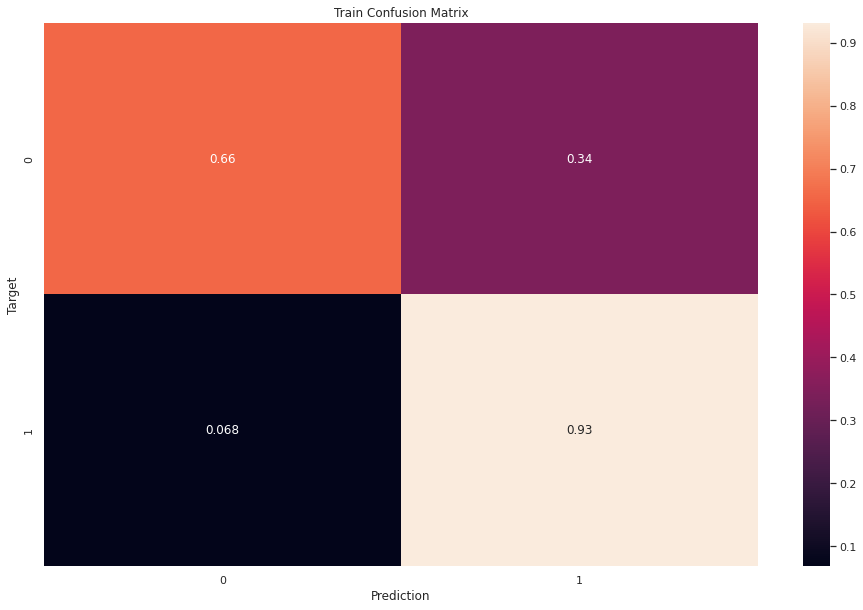

In [111]:
train_preds=predict_and_plot(X_train, y_train,'Train')

Accuracy: 79.67%


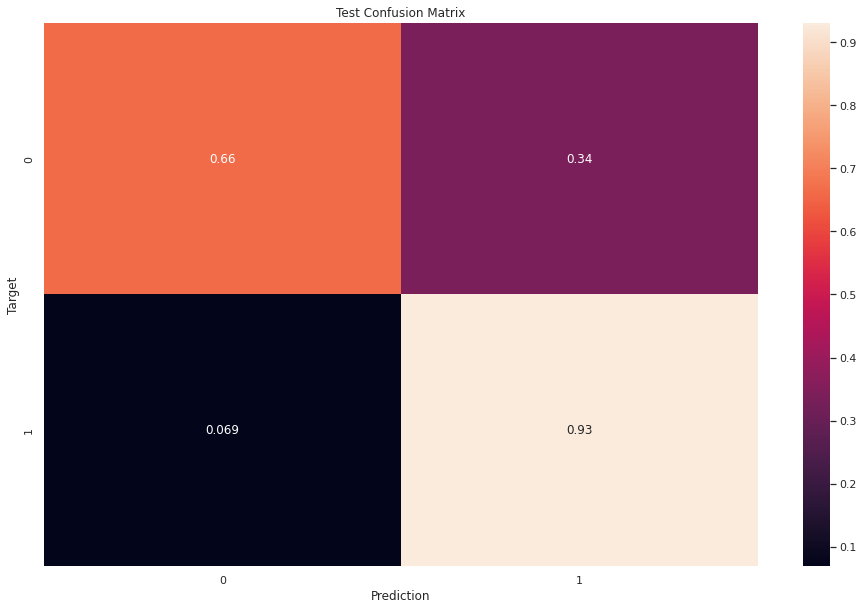

In [112]:
train_preds=predict_and_plot(X_test, y_test,'Test')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


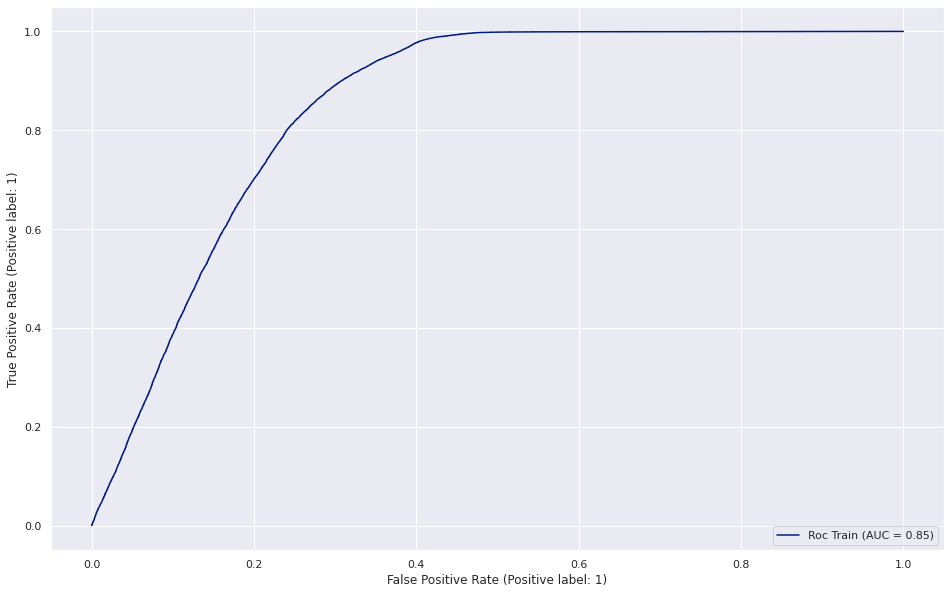

In [113]:
plot_roc_curve(lr, X_train, y_train, name="Roc Train")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


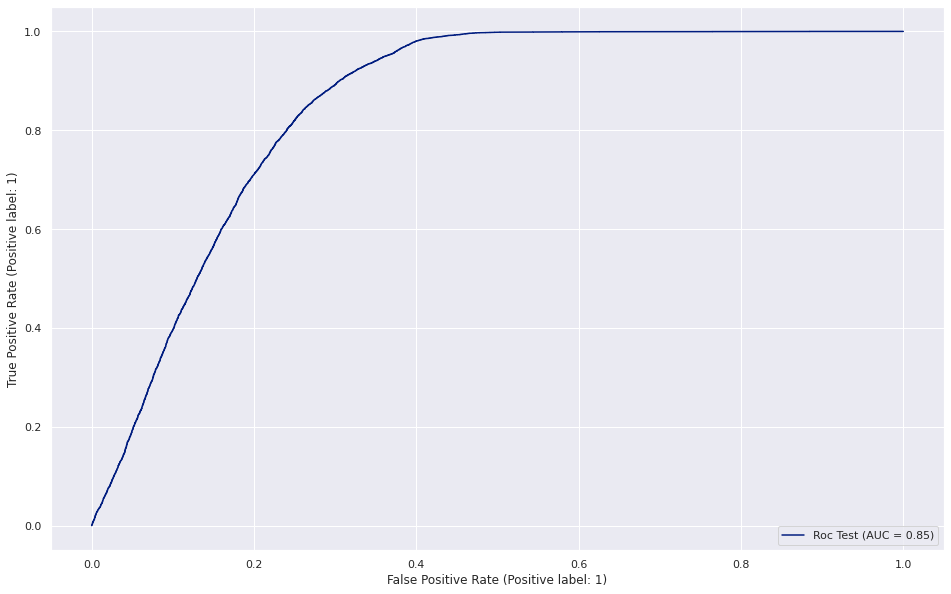

In [115]:
plot_roc_curve(lr, X_test, y_test, name="Roc Test")

In [116]:
ros = RandomOverSampler(sampling_strategy = "minority", random_state=SEED)
X_res, y_res = ros.fit_resample(X, y)

print(X_res.shape)
print(y_res.shape)

(668798, 11)
(668798,)


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.3, random_state= SEED)

lr = LogisticRegression(max_iter=600)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [118]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test =  lr.predict_proba(X_test)

y_pred_train = np.where(y_proba_train[:,1]>0.4, 1, 0)
y_pred_test = np.where(y_proba_test[:,1]>0.4, 1, 0)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    234031
           1       0.71      0.98      0.82    234127

    accuracy                           0.78    468158
   macro avg       0.83      0.78      0.78    468158
weighted avg       0.83      0.78      0.78    468158

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100368
           1       0.71      0.98      0.82    100272

    accuracy                           0.78    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.84      0.78      0.78    200640



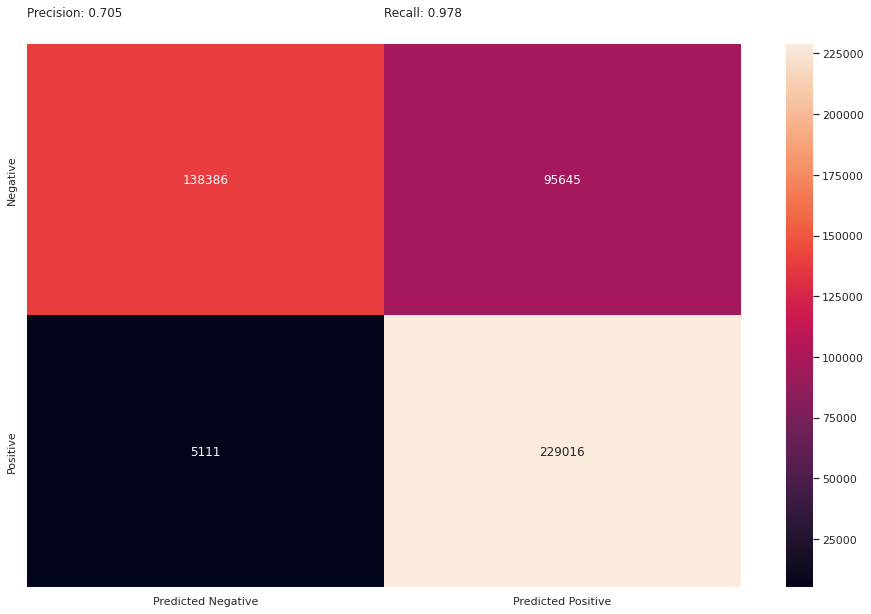

In [119]:
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

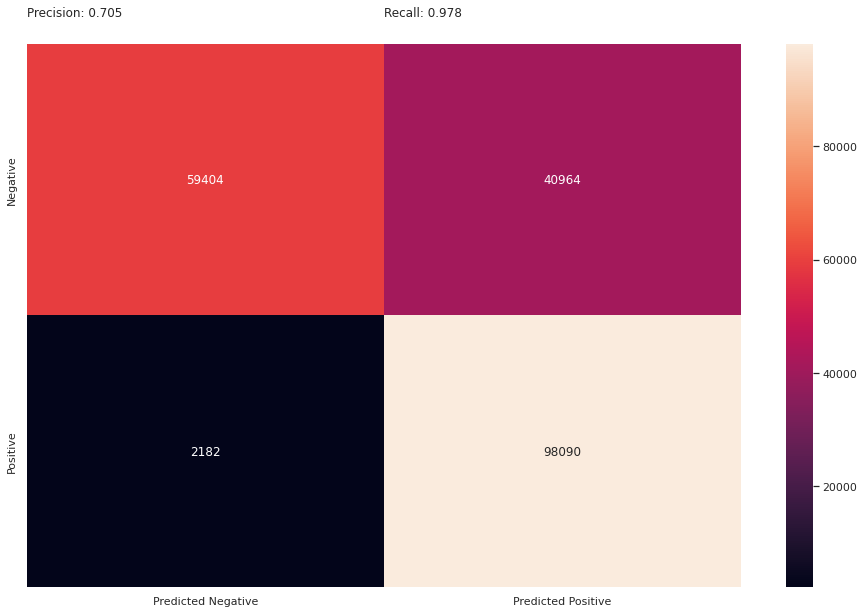

In [120]:
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

Accuracy: 79.28%


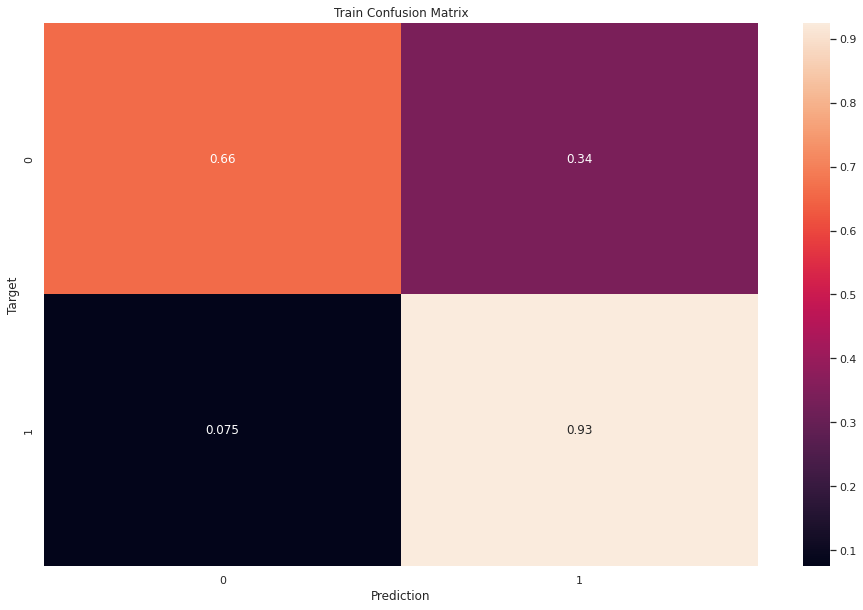

In [121]:
train_preds=predict_and_plot(X_train, y_train,'Train')

Accuracy: 79.23%


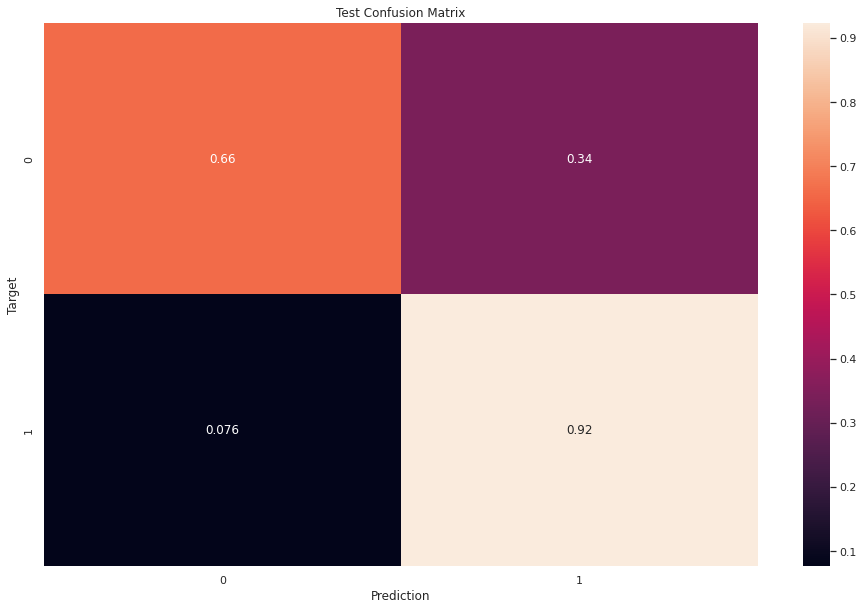

In [122]:
train_preds=predict_and_plot(X_test, y_test,'Test')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


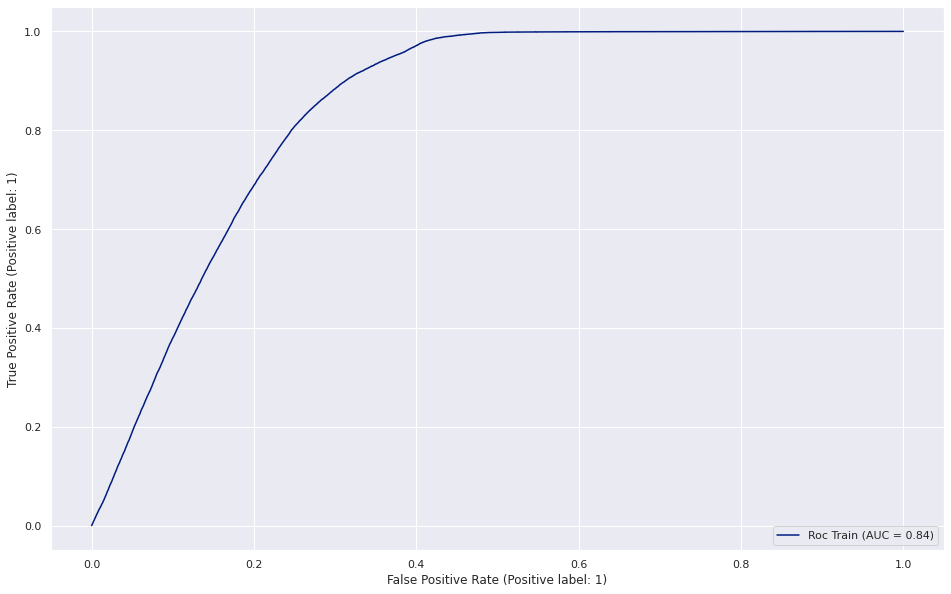

In [123]:
plot_roc_curve(lr, X_train, y_train, name="Roc Train")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


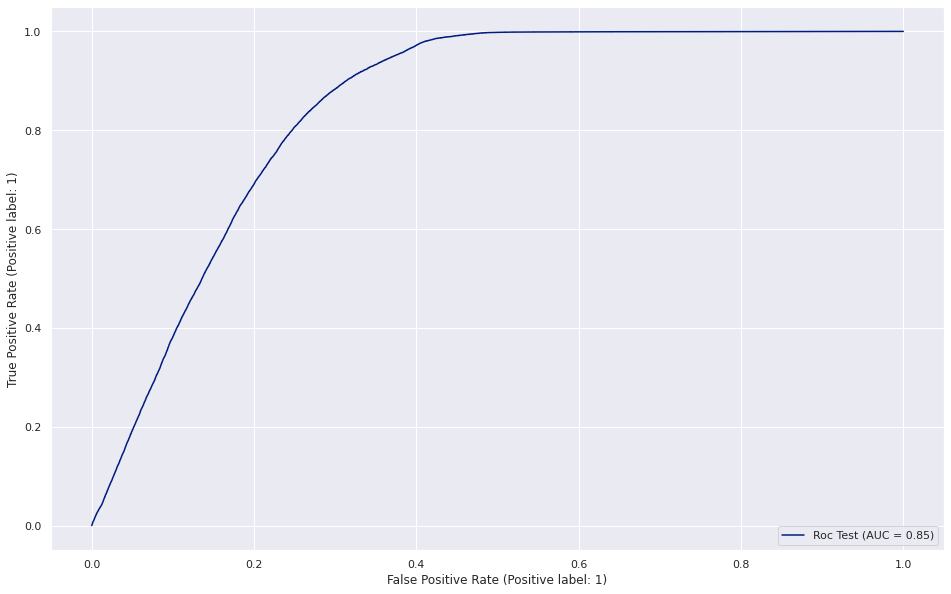

In [124]:
plot_roc_curve(lr, X_test, y_test, name="Roc Test")

In [125]:
columns_to_remove = ["Response", "Region_Code", "Policy_Sales_Channel",
                     "Region_Code_sklearn","Policy_Sales_Channel_sklearn"]

X = df_train.drop(columns_to_remove, axis=1).values
y = df_train["Response"].values

print(X.shape)
print(y.shape)

(381109, 9)
(381109,)


In [126]:
rus = RandomUnderSampler(sampling_strategy = "majority", random_state=SEED)
X_res, y_res = rus.fit_resample(X, y)

print(X_res.shape)
print(y_res.shape)

(93420, 9)
(93420,)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2, random_state= SEED)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [128]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test =  lr.predict_proba(X_test)

y_pred_train = np.where(y_proba_train[:,1]>0.4, 1, 0)
y_pred_test = np.where(y_proba_test[:,1]>0.4, 1, 0)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     37324
           1       0.71      0.98      0.82     37412

    accuracy                           0.79     74736
   macro avg       0.84      0.79      0.78     74736
weighted avg       0.84      0.79      0.78     74736

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      9386
           1       0.71      0.97      0.82      9298

    accuracy                           0.79     18684
   macro avg       0.83      0.79      0.78     18684
weighted avg       0.83      0.79      0.78     18684



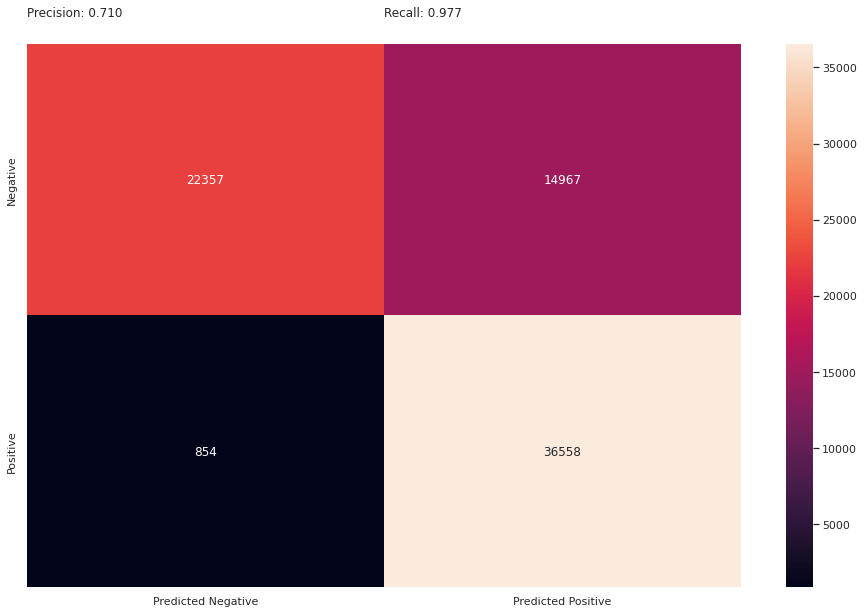

In [129]:
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

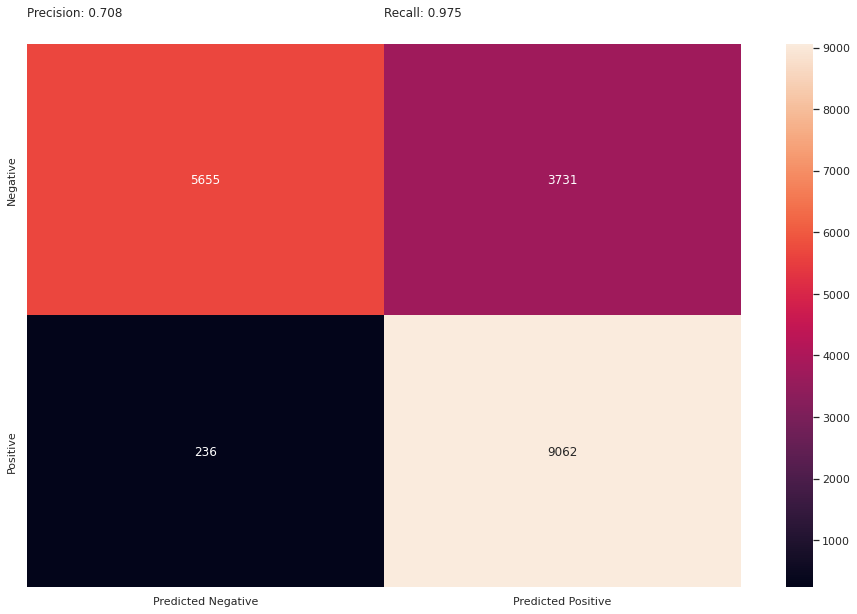

In [130]:
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

Accuracy: 78.72%


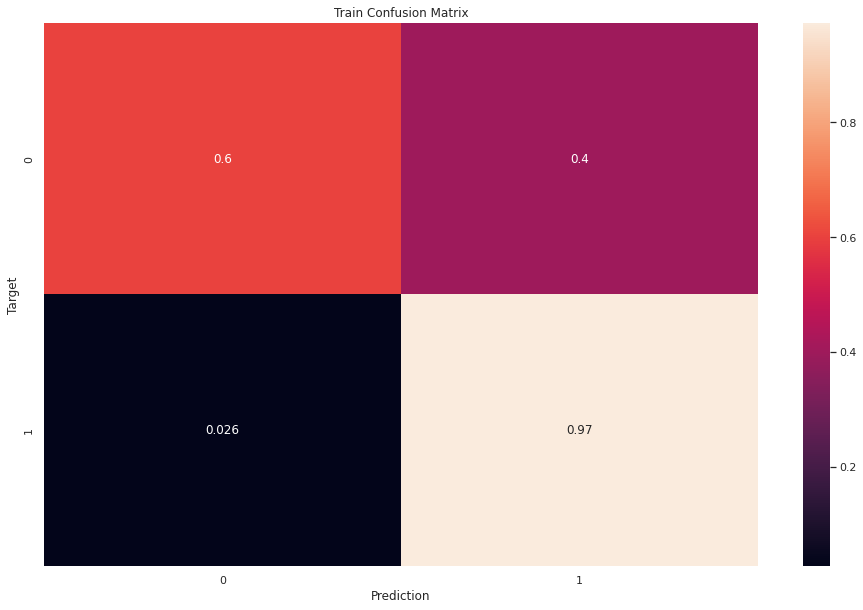

In [131]:
train_preds=predict_and_plot(X_train, y_train,'Train')

Accuracy: 78.69%


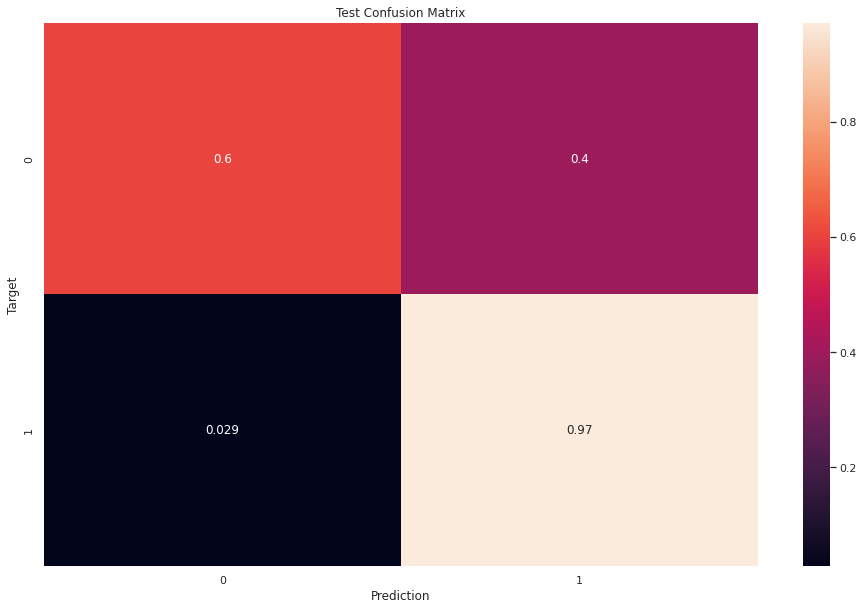

In [132]:
train_preds=predict_and_plot(X_test, y_test,'Test')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


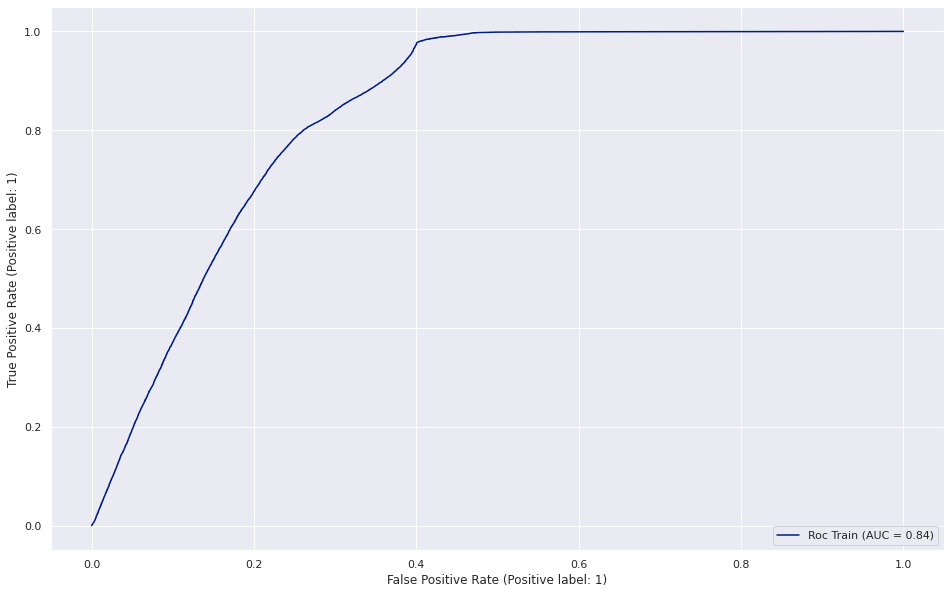

In [133]:
plot_roc_curve(lr, X_train, y_train, name="Roc Train")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


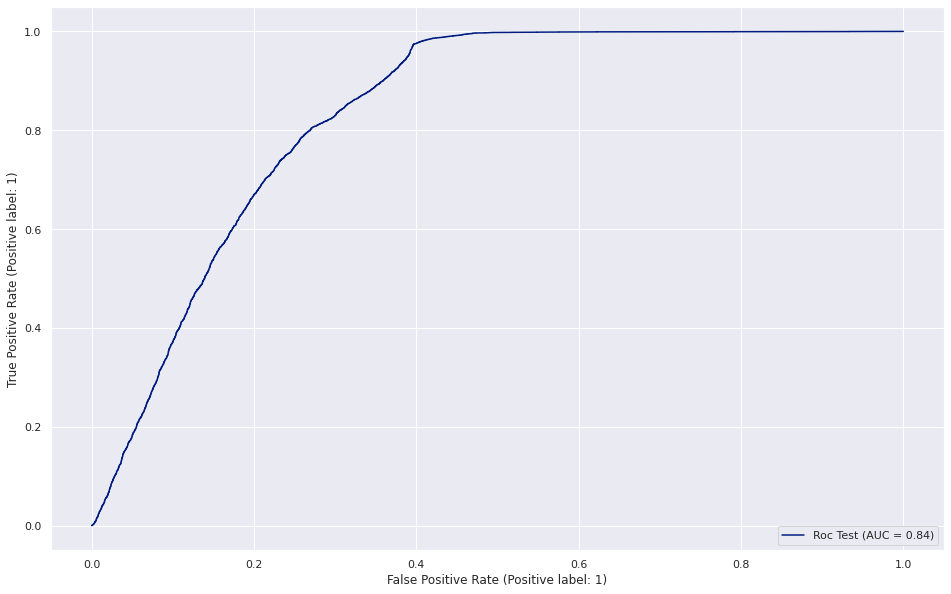

In [134]:
plot_roc_curve(lr, X_test, y_test, name="Roc Test")

In [135]:
ros = RandomOverSampler(sampling_strategy = "minority", random_state=SEED)
X_res, y_res = ros.fit_resample(X, y)

print(X_res.shape)
print(y_res.shape)

(668798, 9)
(668798,)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.3, random_state= SEED)

lr = LogisticRegression(max_iter=600)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [137]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test =  lr.predict_proba(X_test)

y_pred_train = np.where(y_proba_train[:,1]>0.4, 1, 0)
y_pred_test = np.where(y_proba_test[:,1]>0.4, 1, 0)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    234031
           1       0.71      0.98      0.82    234127

    accuracy                           0.78    468158
   macro avg       0.83      0.78      0.78    468158
weighted avg       0.83      0.78      0.78    468158

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100368
           1       0.71      0.98      0.82    100272

    accuracy                           0.78    200640
   macro avg       0.83      0.78      0.78    200640
weighted avg       0.83      0.78      0.78    200640



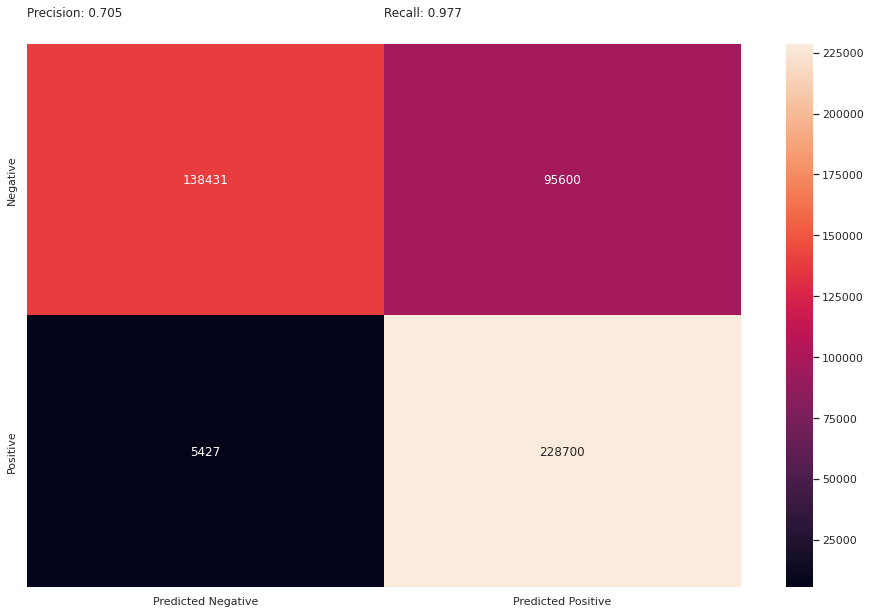

In [138]:
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

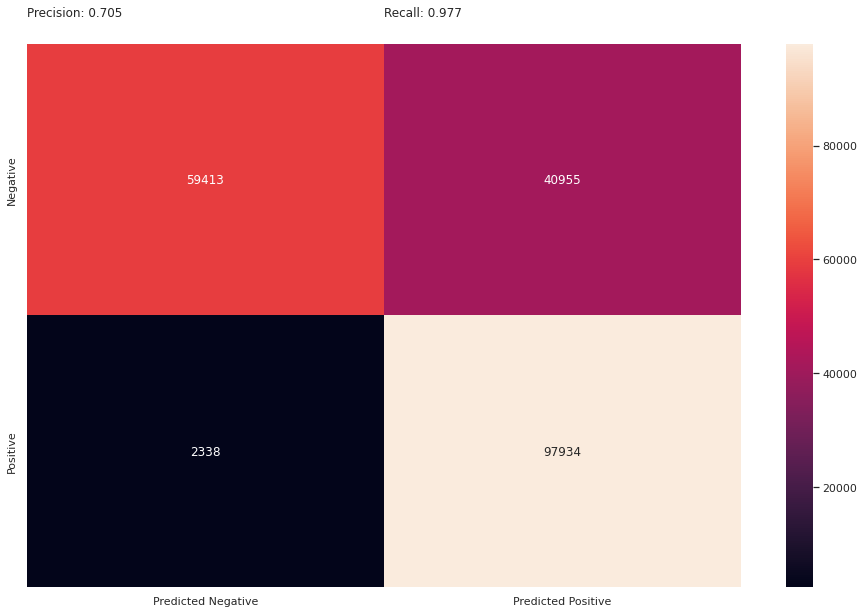

In [139]:
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

Accuracy: 78.29%


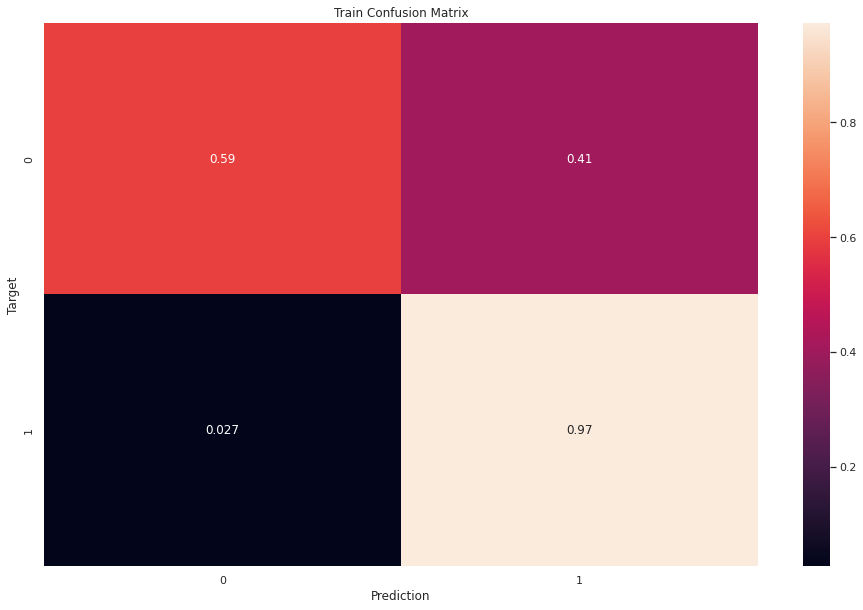

In [140]:
train_preds=predict_and_plot(X_train, y_train,'Train')

Accuracy: 78.29%


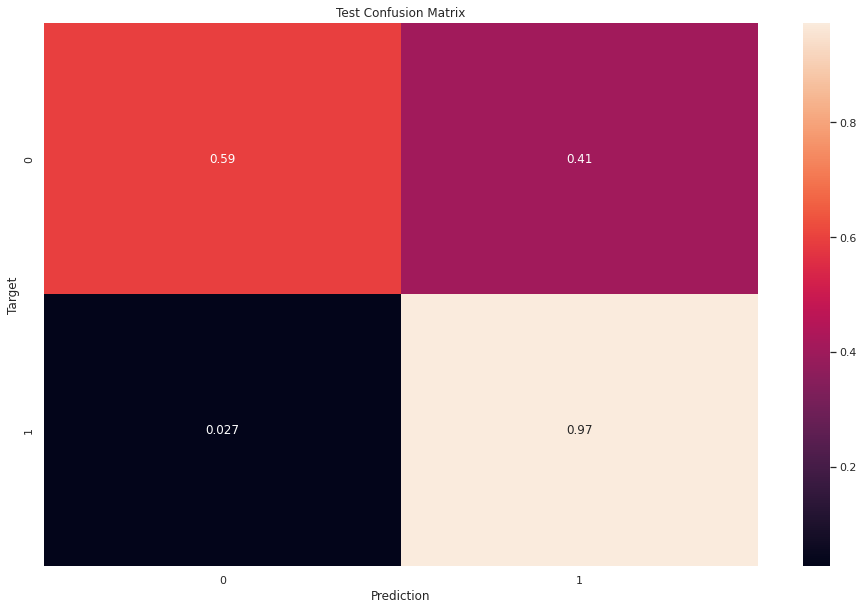

In [141]:
train_preds=predict_and_plot(X_test, y_test,'Test')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


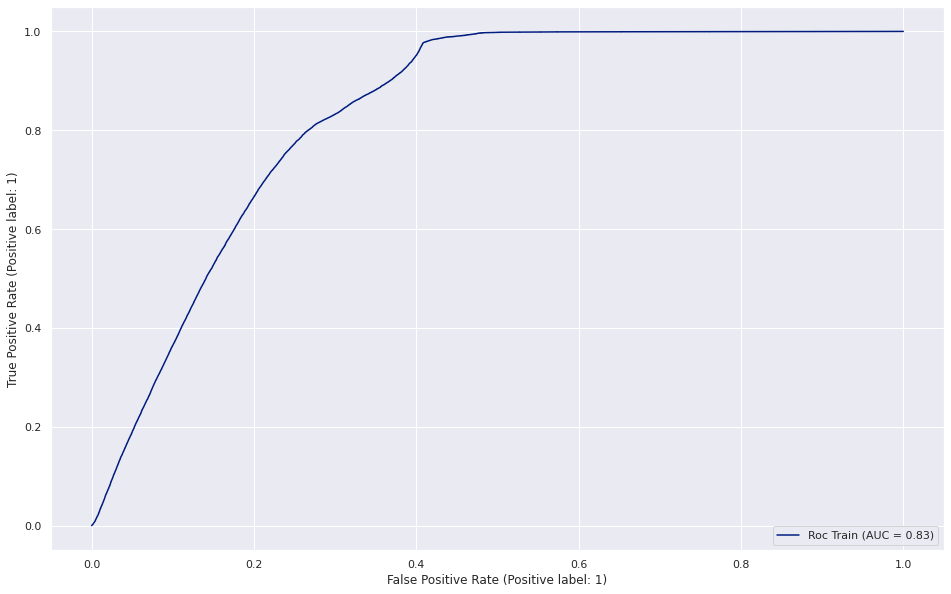

In [142]:
plot_roc_curve(lr, X_train, y_train, name="Roc Train")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


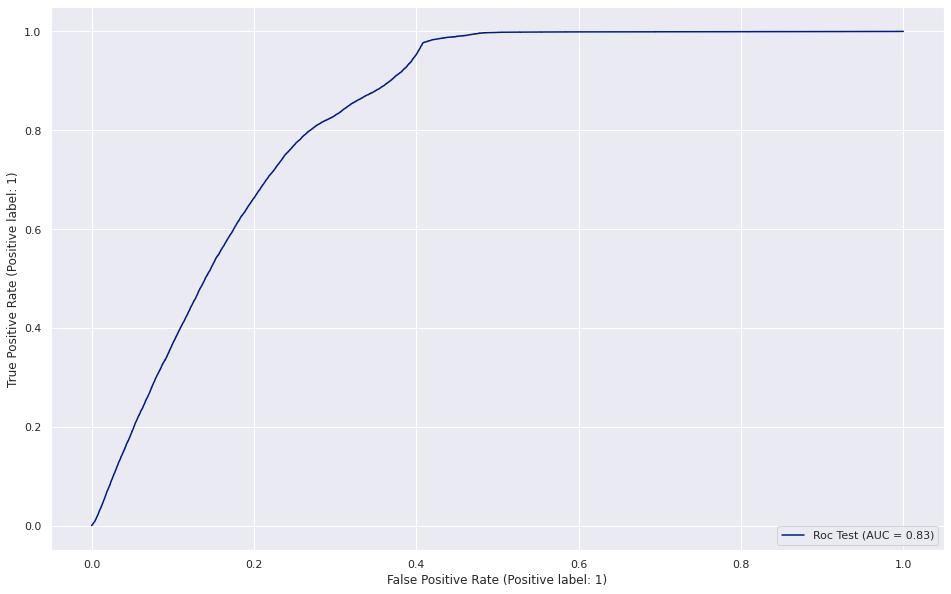

In [143]:
plot_roc_curve(lr, X_test, y_test, name="Roc Test")

In [144]:
X = df_train.drop(["Response", "Region_Code", "Policy_Sales_Channel"], axis=1).values
y = df_train["Response"].values

print(X.shape)
print(y.shape)

(381109, 11)
(381109,)


In [145]:
df_train

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Previously_Insured_1,Driving_License_1,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_sklearn,Policy_Sales_Channel_sklearn
0,0.333777,28.0,0.574539,26.0,0.748795,1,1,0,1,1,0,1,0.187163,0.199385
1,2.396751,3.0,0.172636,26.0,0.342443,0,1,0,1,0,0,0,0.127662,0.199385
2,0.527181,28.0,0.449053,26.0,-1.521998,1,1,0,1,1,0,1,0.187163,0.199385
3,-1.148985,11.0,-0.113018,152.0,0.581474,0,1,1,1,0,1,0,0.112760,0.028624
4,-0.633242,41.0,-0.178259,152.0,-1.378580,0,0,1,1,0,1,0,0.121776,0.028624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,2.267815,26.0,-0.022912,26.0,-0.792954,0,1,1,1,0,0,0,0.072284,0.199385
381105,-0.568774,37.0,0.549093,152.0,-0.279037,0,1,1,1,0,1,0,0.079258,0.028624
381106,-1.148985,30.0,0.264543,160.0,0.079509,0,1,1,1,0,1,0,0.073825,0.021810
381107,1.881007,14.0,0.816389,124.0,-0.960275,0,0,0,1,1,0,1,0.090209,0.189148


In [146]:
rus = RandomUnderSampler(sampling_strategy = "majority", random_state=SEED)
X_res, y_res = rus.fit_resample(X, y)

print(X_res.shape)
print(y_res.shape)

(93420, 11)
(93420,)


In [150]:
cols_to_drop = ["id", "Region_Code", "Policy_Sales_Channel"]

X = dataset_test.drop(cols_to_drop, axis=1).values

y_proba = model.predict_proba(X)
y_pred = np.where(y_proba[:,1]>0.4,1,0)
df_result = pd.DataFrame({
    "id":dataset_test["id"],
    "Response":y_pred
})
df_result.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


In [147]:
model = LogisticRegression(max_iter=500)
model.fit(X_res, y_res)

LogisticRegression(max_iter=500)